## Data Science Engineering Methods
# AutoML

In this assignment, you will use an AutoML library like H2O.ai to create predictive models and interpret them. Find a significant relation for each algorithm of your choosing in your data. Create multivariate models.
(For the moment you will assume the data is good.)

Answer the following questions for all the models:
* Is the relationship significant?

* Are any model assumptions violated?

* Is there any multicollinearity in the model?

* In the multivariate models are predictor variables independent of all the other predictor variables?

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

* Does the model make sense?

* Does regularization help?

* Which independent variables are significant?

* Which hyperparameters are important?

Automated machine learning (AutoML) is the process of automating the end-to-end process of applying machine learning to real-world problems.

H2O AutoML automates the steps like basic data processing, model training and tuning, Ensemble and stacking of various models to provide the models with the best performance so that developers can focus on other steps like data collection, feature engineering and deployment of model.

We are initializing H2O in the following steps.

In [ ]:
##Installing all the required libraries for the Assignment
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.1-py2.py3-none-any.whl size=257484150 sha256=5f90bed8b973eb245bb6361f8a9ce31bafec2ead9ef7e74103f2bce04efdd3b0
  Stored in directory: /root/.cache/pip/wheels/d9/9b/ca/7345b72d17e1e17da37239d70631c3214ec9e541b0c9e700e2
Successfully built h2o


In [ ]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [ ]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
min_mem_size=6
run_time=222

In [ ]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

5


In [ ]:
port_no=random.randint(5555,55555)

try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:37597..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp6d81sw87
  JVM stdout: /tmp/tmp6d81sw87/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp6d81sw87/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:37597
Connecting to H2O server at http://127.0.0.1:37597 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         12 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.1
H2O_cluster_version_age:    18 days
H2O_cluster_name:           H2O_from_python_unknownUser_nezw4w
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    5 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:37597
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
# Import the processed data from notebook One
url = "https://raw.githubusercontent.com/RakshitaJ-Neu/info6105-dataset/main/AB_NYC_2019.csv"
dataframe = h2o.import_file(path = url)
dataset = pd.read_csv('https://raw.githubusercontent.com/RakshitaJ-Neu/info6105-dataset/main/AB_NYC_2019.csv')
dataset

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-10-19               0.21                               6   
1      2019-05-21               0.38                               2   
2             NaN                NaN                               1   
3      2019-07-05               4.64                               1   
4      2018-11-19               0.10                               1   
...           ...                ...                             ...   
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
0                   365  
1                   355  
2                   365  
3                   194  
4                     0  
...                 ...  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23  

[48895 rows x 16 columns]

In [ ]:
dataset.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [ ]:
dataframe
dataframe.types

{'id': 'int',
 'name': 'string',
 'host_id': 'int',
 'host_name': 'enum',
 'neighbourhood_group': 'enum',
 'neighbourhood': 'enum',
 'latitude': 'real',
 'longitude': 'real',
 'room_type': 'enum',
 'price': 'int',
 'minimum_nights': 'int',
 'number_of_reviews': 'int',
 'last_review': 'time',
 'reviews_per_month': 'real',
 'calculated_host_listings_count': 'int',
 'availability_365': 'int'}

In [ ]:
import plotly.express as px

lat = np.mean(dataset['latitude'])
lon = np.mean(dataset['longitude'])


fig = px.density_mapbox(dataset, lat='latitude', lon='longitude', z='price', radius=2,
                        center=dict(lat = lat, lon = lon), zoom=10,
                        mapbox_style="carto-positron")
fig.show()

In [ ]:
dataframe.shape

(48895, 16)

In [ ]:
# Create a 80/20 train/test split
pct_rows=0.80
dataframe_train, dataframe_test = dataframe.split_frame([pct_rows])

In [ ]:
print(dataframe_train.shape)
print(dataframe_test.shape)

(39114, 16)
(9781, 16)


In [ ]:
#Display all columns in X
X=dataframe.columns
print(X)

['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [ ]:
y_target = 'price'
X.remove(y_target)
print(X)

['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [ ]:
dfpd = pd.read_csv('https://raw.githubusercontent.com/RakshitaJ-Neu/info6105-dataset/main/AB_NYC_2019.csv')

Run AutoML here

In [ ]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [ ]:
# Pass the data through H20AutoML
aml.train(x=X,y=y_target,training_frame=dataframe_train)

AutoML progress: |
04:44:38.249: _train param, Dropping bad and constant columns: [name]

███████████████
04:45:31.413: _train param, Dropping bad and constant columns: [name]

███████████████
04:46:22.592: GLM_1_AutoML_1_20231104_44438 [GLM def_1] failed: DistributedException from /127.0.0.1:37597: 'Java heap space', caused by java.lang.OutOfMemoryError: Java heap space
04:46:22.614: _train param, Dropping bad and constant columns: [name]

████████████████
04:47:20.228: _train param, Dropping unused columns: [name]


04:47:22.94: _train param, Dropping bad and constant columns: [name]

███
04:47:32.180: _train param, Dropping bad and constant columns: [name]

███
04:47:42.398: _train param, Dropping bad and constant columns: [name]

██
04:47:50.717: _train param, Dropping bad and constant columns: [name]

███
04:47:59.390: _train param, Dropping bad and constant columns: [name]

██
04:48:08.77: _train param, Dropping unused columns: [name]

█
04:48:10.63: _train param, Dropping unused

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20231104_44438


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  5/7
# GBM base models (used / total)      2/4
# XGBoost base models (used / total)  2/2
# DRF base models (used / total)      1/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 42188.69590800841
RMSE: 205.3988702695524
MAE: 56.963347823873605
RMSLE: NaN
Mean Residual Deviance: 42188.69590800841
R^2: 0.411083374000503
Null degrees of freedom: 10047
Residual degrees of freedom: 10042
Null deviance: 719818290.46679
Residual deviance: 423912016.4836685
AIC: 135539.26027444683

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 53123.12928061214
RMSE: 230.48455323646343
MAE: 66.5720665739244
RMSLE: NaN
Mean Residual Deviance: 53123.12928061214
R^2: 0.17877575411439894
Null degrees of freedom: 39113
Residual degrees of freedom: 39108
Null deviance: 2530251578.746194
Residual deviance: 2077858078.6818633
AIC: 536589.4254829768

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     66.5699      1.40494      64.8555       66.4812       67.7171       65.5907       68.2049
mean_residual_deviance  53153        10393.3      37155.5       63034         50845.3       61707.9       53022.5
mse                     53153        10393.3      37155.5       63034         50845.3       61707.9       53022.5
null_deviance           5.0605e+08   9.18995e+07  3.53119e+08   5.78661e+08   5.13004e+08   5.77246e+08   5.08222e+08
r2                      0.179497     0.0234365    0.175586      0.154437      0.216141      0.166133      0.185187
residual_deviance       4.15572e+08  7.97459e+07  2.91076e+08   4.8927e+08    4.02085e+08   4.81322e+08   4.14105e+08
rmse                    229.598      23.3951      192.758       251.066       225.489       248.411       230.266
rmsle                   0.493229     0.00932927   nan           nan           0.499826      0.486632      nan

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [ ]:
print(aml.leaderboard)

model_id                                                   rmse      mse      mae       rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20231104_44438     230.485  53123.1  66.5721  nan                          53123.1
StackedEnsemble_BestOfFamily_1_AutoML_1_20231104_44438  231.505  53594.4  67.5563  nan                          53594.4
StackedEnsemble_BestOfFamily_2_AutoML_1_20231104_44438  231.87   53763.6  67.0576    0.497244                   53763.6
GBM_1_AutoML_1_20231104_44438                           233.526  54534.4  68.0483  nan                          54534.4
GBM_2_AutoML_1_20231104_44438                           235.906  55651.8  68.2595  nan                          55651.8
GBM_4_AutoML_1_20231104_44438                           236.135  55759.9  70.4545    0.548269                   55759.9
XGBoost_2_AutoML_1_20231104_44438                       237.041  56188.5  66.6654  nan                          56188.5
GBM_3_AutoML_1_20231104_44438           

Relation between Variables

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = dataset[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
Multic = Multic.dropna()
#Compute VIF

for column in Multic.columns:
    Multic[column] = pd.to_numeric(Multic[column], errors='coerce')

vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

variables            VIF
0                        latitude  423565.951314
1                       longitude  423503.351886
2                  minimum_nights       1.152508
3               number_of_reviews       2.004827
4               reviews_per_month       2.450986
5  calculated_host_listings_count       1.089455
6                availability_365       1.976886

In [ ]:
import statsmodels.formula.api as smf #OLS model Library
results = smf.ols('price ~ longitude + minimum_nights + number_of_reviews + availability_365', data=dfpd).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     440.1
Date:                Sat, 04 Nov 2023   Prob (F-statistic):               0.00
Time:                        04:48:22   Log-Likelihood:            -3.3652e+05
No. Observations:               48895   AIC:                         6.731e+05
Df Residuals:                   48890   BIC:                         6.731e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5.924e+04   1721.814    -34.407      0.000   -6.26e+04   -5.59e+04
longitude          -802.9452     23.282    -34.488      0.000    -848.578    -757.313
minimum_nights        0.1634      0.053      3.082      0.002       0.059       0.267
number_of_reviews    -0.2980      0.024    -12.175      0.000      -0.346      -0.250
availability_365      0.1863      0.008     22.259      0.000       0.170       0.203
==============================================================================
Omnibus:                   106525.766   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        780007815.498
Skew:                          19.726   Prob(JB):                         0.00
Kurtosis:                     620.502   Cond. No.                     2.94e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = dataset[['latitude', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']]
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

variables       VIF
0                        latitude  1.883789
1               number_of_reviews  1.329593
2  calculated_host_listings_count  1.118219
3                availability_365  1.898605

In [ ]:
import statsmodels.formula.api as smf #OLS model Library
results = smf.ols('price ~ latitude + number_of_reviews + calculated_host_listings_count + availability_365', data=dfpd).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     159.2
Date:                Sat, 04 Nov 2023   Prob (F-statistic):          1.35e-135
Time:                        04:48:22   Log-Likelihood:            -3.3707e+05
No. Observations:               48895   AIC:                         6.741e+05
Df Residuals:                   48890   BIC:                         6.742e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -5832.6843    806.325     -7.234      0.000   -7413.091   -4252.278
latitude                         146.6690     19.797      7.409      0.000     107.867     185.471
number_of_reviews                 -0.3215      0.025    -12.986      0.000      -0.370      -0.273
calculated_host_listings_count     0.2430      0.034      7.177      0.000       0.177       0.309
availability_365                   0.1550      0.009     18.062      0.000       0.138       0.172
==============================================================================
Omnibus:                   105555.056   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        728180974.682
Skew:                          19.314   Prob(JB):                         0.00
Kurtosis:                     599.602   Cond. No.                     1.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Dopping the unecessary features as discussed above
dfpd=dfpd.drop(['longitude', 'last_review'], axis=1)

In [ ]:
dfpd

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

             room_type  price  minimum_nights  number_of_reviews  \
0         Private room    149               1                  9   
1      Entire home/apt    225               1                 45   
2         Private room    150               3                  0   
3      Entire home/apt     89               1                270   
4      Entire home/apt     80              10                  9   
...                ...    ...             ...                ...   
48890     Private room     70               2                  0   
48891     Private room     40               4                  0   
48892  Entire home/apt    115              10                  0   
48893      Shared room     55               1                  0   
48894     Private room     90               7                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.21                               6               365  
1                   0.38                               2               355  
2                    NaN                               1               365  
3                   4.64                               1               194  
4                   0.10                               1                 0  
...                  ...                             ...               ...  
48890                NaN                               2                 9  
48891                NaN                               2                36  
48892                NaN                               1                27  
48893                NaN                               6                 2  
48894                NaN                               1                23  

[48895 rows x 14 columns]

In [ ]:
#Calculating correlation matrix for all variables
dfpd.corr()

id   host_id  latitude     price  \
id                              1.000000  0.588290 -0.003125  0.010619   
host_id                         0.588290  1.000000  0.020224  0.015309   
latitude                       -0.003125  0.020224  1.000000  0.033939   
price                           0.010619  0.015309  0.033939  1.000000   
minimum_nights                 -0.013224 -0.017364  0.024869  0.042799   
number_of_reviews              -0.319760 -0.140106 -0.015389 -0.047954   
reviews_per_month               0.291828  0.296417 -0.010142 -0.030608   
calculated_host_listings_count  0.133272  0.154950  0.019517  0.057472   
availability_365                0.085468  0.203492 -0.010983  0.081829   

                                minimum_nights  number_of_reviews  \
id                                   -0.013224          -0.319760   
host_id                              -0.017364          -0.140106   
latitude                              0.024869          -0.015389   
price                                 0.042799          -0.047954   
minimum_nights                        1.000000          -0.080116   
number_of_reviews                    -0.080116           1.000000   
reviews_per_month                    -0.121702           0.549868   
calculated_host_listings_count        0.127960          -0.072376   
availability_365                      0.144303           0.172028   

                                reviews_per_month  \
id                                       0.291828   
host_id                                  0.296417   
latitude                                -0.010142   
price                                   -0.030608   
minimum_nights                          -0.121702   
number_of_reviews                        0.549868   
reviews_per_month                        1.000000   
calculated_host_listings_count          -0.009421   
availability_365                         0.185791   

                                calculated_host_listings_count  \
id                                                    0.133272   
host_id                                               0.154950   
latitude                                              0.019517   
price                                                 0.057472   
minimum_nights                                        0.127960   
number_of_reviews                                    -0.072376   
reviews_per_month                                    -0.009421   
calculated_host_listings_count                        1.000000   
availability_365                                      0.225701   

                                availability_365  
id                                      0.085468  
host_id                                 0.203492  
latitude                               -0.010983  
price                                   0.081829  
minimum_nights                          0.144303  
number_of_reviews                       0.172028  
reviews_per_month                       0.185791  
calculated_host_listings_count          0.225701  
availability_365                        1.000000

Text(0.5, 1.0, 'Variable Correlation')

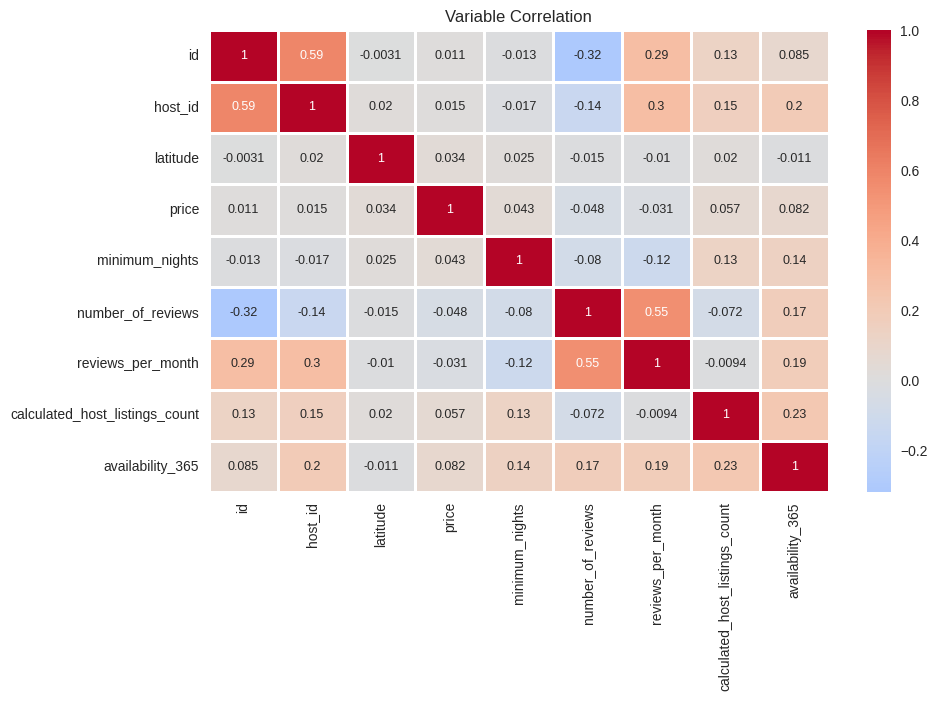

In [ ]:
#Representing Matrix as a plot
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(10,6))

sns.heatmap(dfpd.corr(),center=0, linewidths=0.8,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

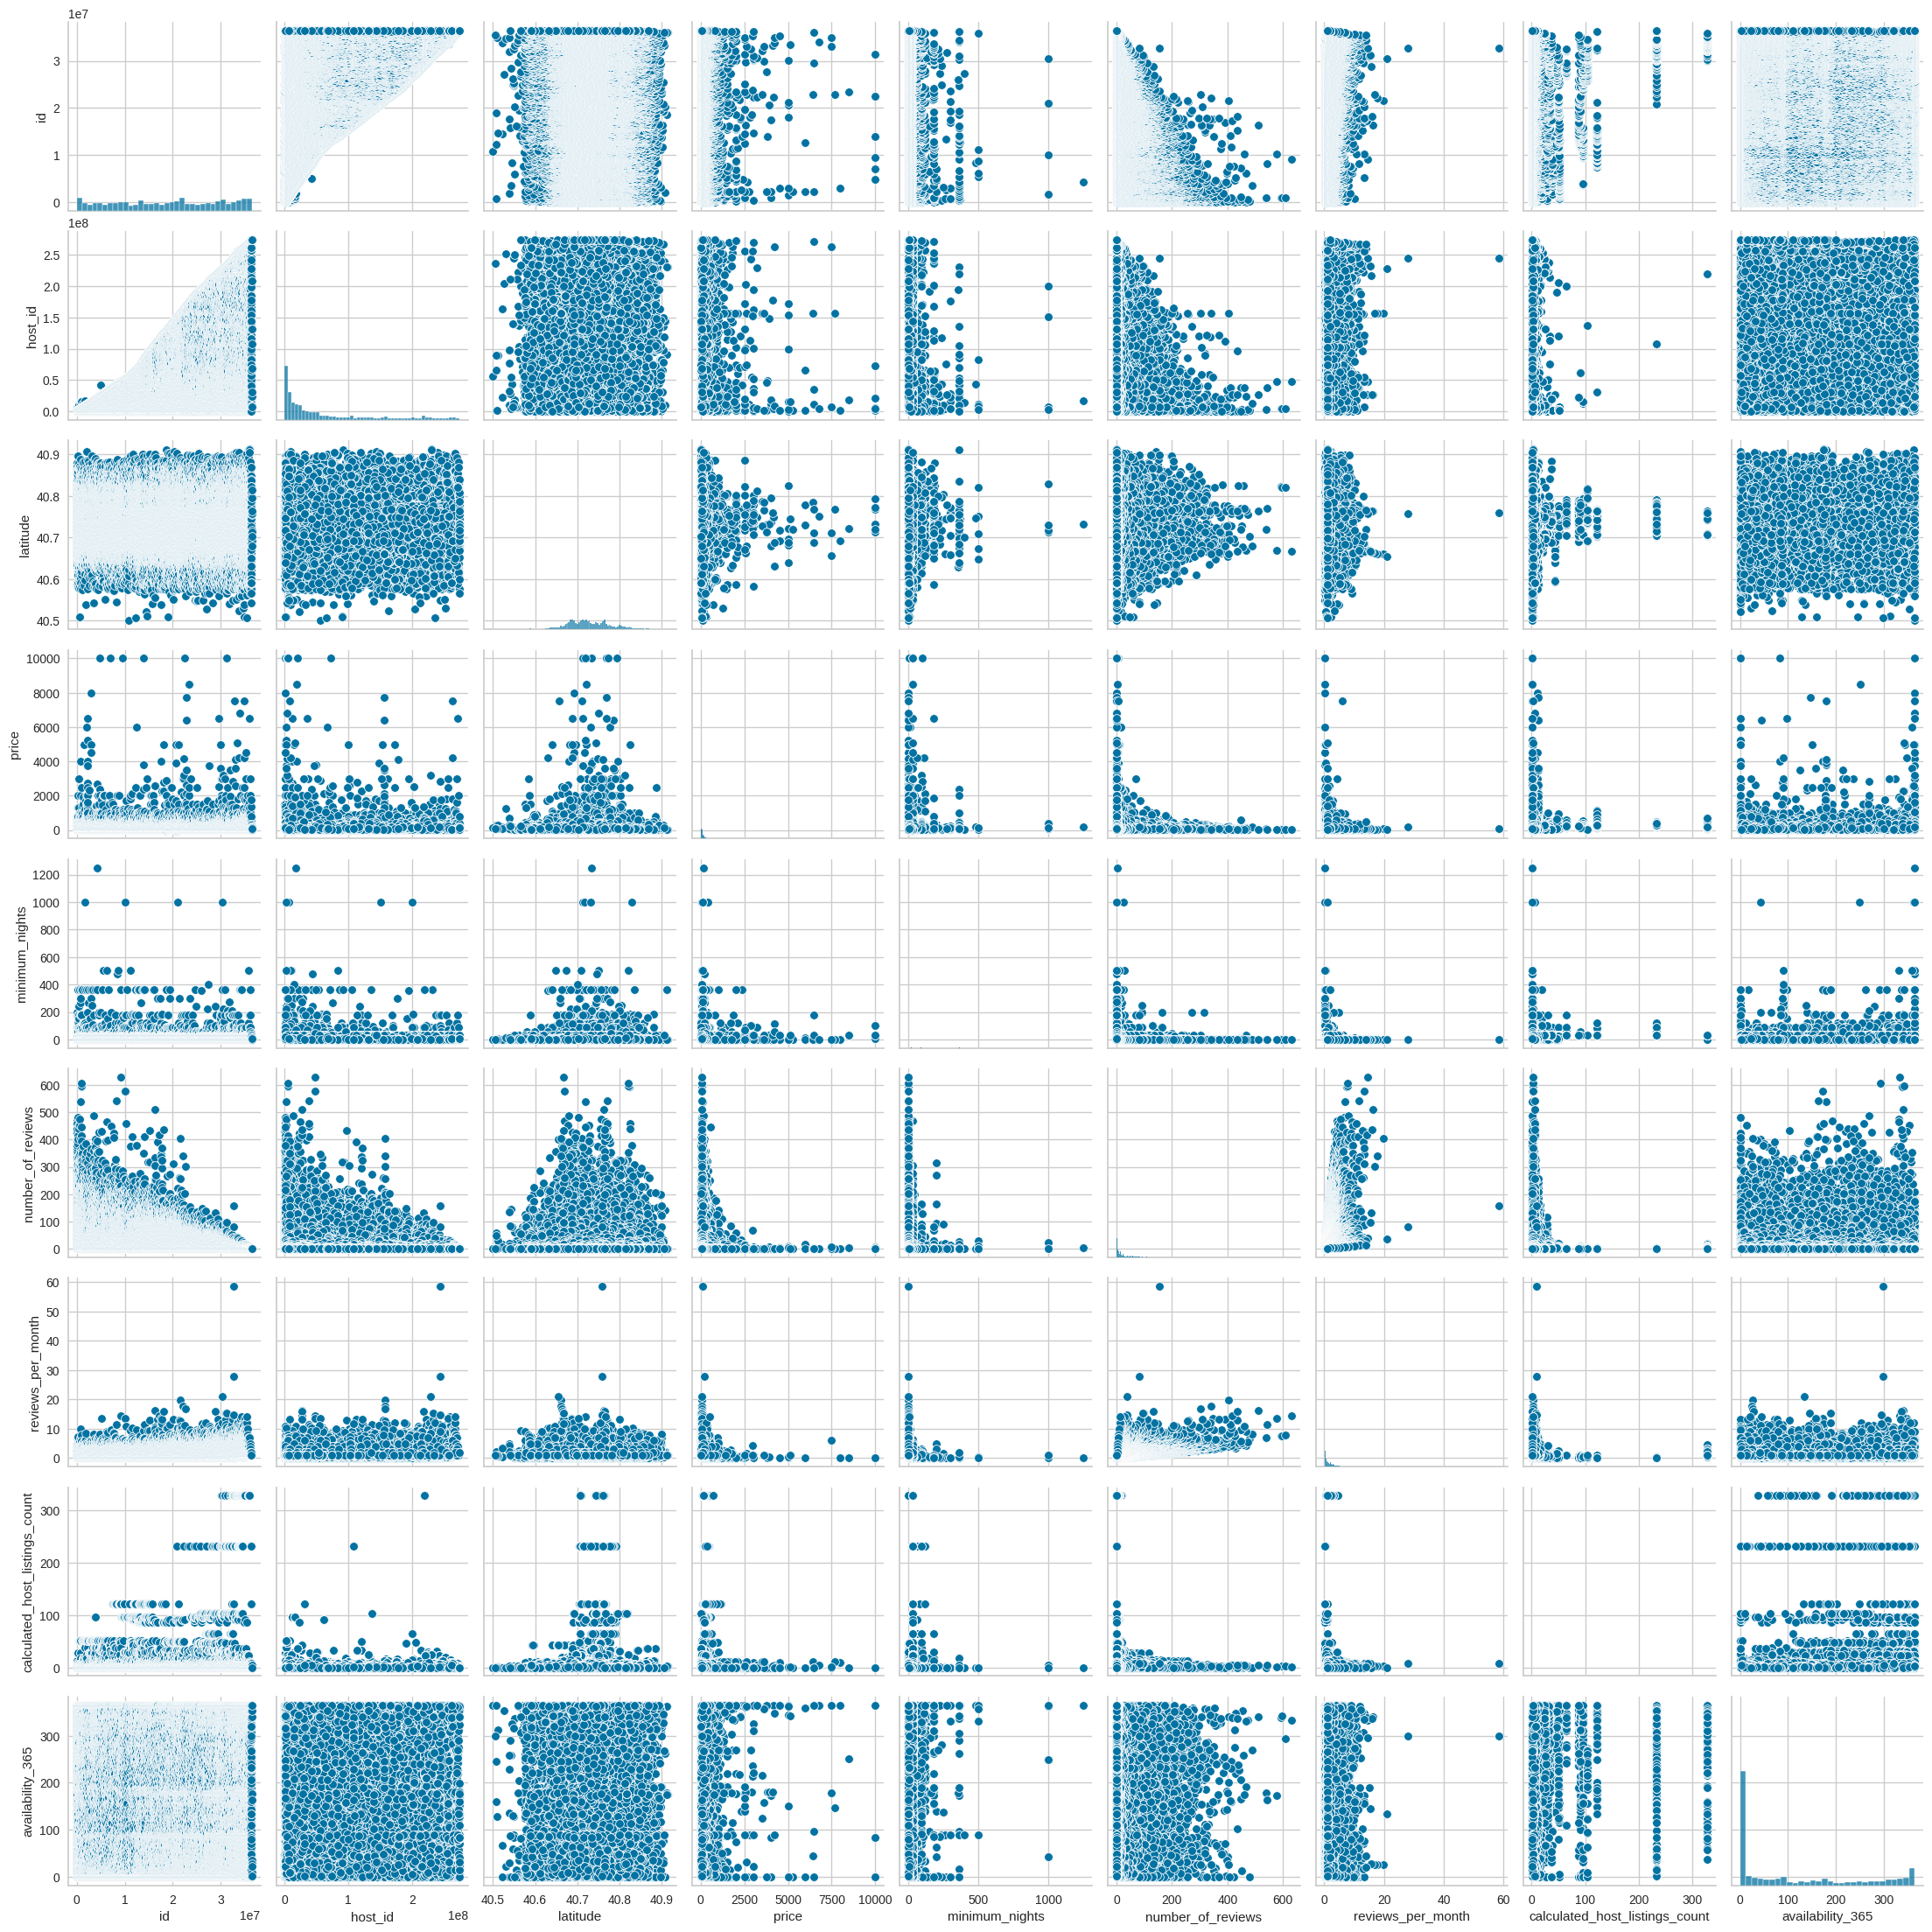

In [ ]:
sns.pairplot(dfpd)

### AutoML Rexecution on new model

In [ ]:
df=dataframe.drop(['longitude', 'last_review'], axis=1)
df_train, df_test = df.split_frame([pct_rows])

In [ ]:
X1=df.columns
print(X1)

y1_numeric = 'price'
X1.remove(y1_numeric)

['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [ ]:
aml1 = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [ ]:
aml1.train(x=X1,y=y1_numeric,training_frame=df_train)

AutoML progress: |
04:49:40.803: _train param, Dropping bad and constant columns: [name]

████████████████
04:50:37.540: _train param, Dropping bad and constant columns: [name]

████████████
04:51:18.556: GLM_1_AutoML_2_20231104_44940 [GLM def_1] failed: DistributedException from /127.0.0.1:37597: 'Java heap space', caused by java.lang.OutOfMemoryError: Java heap space
04:51:19.114: _train param, Dropping bad and constant columns: [name]

███████████████
04:52:12.325: _train param, Dropping unused columns: [name]


04:52:13.223: _train param, Dropping bad and constant columns: [name]

███
04:52:24.36: _train param, Dropping bad and constant columns: [name]

████
04:52:36.810: _train param, Dropping bad and constant columns: [name]

███
04:52:46.901: _train param, Dropping bad and constant columns: [name]

██
04:52:57.297: _train param, Dropping bad and constant columns: [name]

███
04:53:07.12: _train param, Dropping unused columns: [name]


04:53:08.8: _train param, Dropping unused co

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_2_20231104_44940


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  5/7
# GBM base models (used / total)      2/4
# XGBoost base models (used / total)  2/2
# DRF base models (used / total)      1/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 33694.70772572956
RMSE: 183.5611825134322
MAE: 57.07973523630378
RMSLE: NaN
Mean Residual Deviance: 33694.70772572956
R^2: 0.5486977128645734
Null degrees of freedom: 10042
Residual degrees of freedom: 10037
Null deviance: 749868427.141621
Residual deviance: 338395949.68950194
AIC: 133214.0391409551

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 45553.26011072392
RMSE: 213.43209718953688
MAE: 65.48111134183915
RMSLE: NaN
Mean Residual Deviance: 45553.26011072392
R^2: 0.21430494627658547
Null degrees of freedom: 39190
Residual degrees of freedom: 39185
Null deviance: 2272324795.316696
Residual deviance: 1785277816.999381
AIC: 531620.8892850446

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     65.4823      1.47077      64.0518       64.8919       65.2162       65.2896       67.9621
mean_residual_deviance  45561.4      9626.97      34718.7       46755.1       45849.8       40047.6       60435.5
mse                     45561.4      9626.97      34718.7       46755.1       45849.8       40047.6       60435.5
null_deviance           4.54465e+08  7.85646e+07  3.38533e+08   4.82132e+08   4.45309e+08   4.50002e+08   5.56348e+08
r2                      0.215771     0.0603741    0.19439       0.245594      0.18385       0.304773      0.150248
residual_deviance       3.57056e+08  7.50489e+07  2.72646e+08   3.63708e+08   3.63406e+08   3.12852e+08   4.72666e+08
rmse                    212.528      22.1701      186.329       216.229       214.126       200.119       245.836
rmsle                   nan          0            nan           nan           nan           nan           nan

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [ ]:
print(aml1.leaderboard)

model_id                                                   rmse      mse      mae       rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_2_20231104_44940     213.432  45553.3  65.4811  nan                          45553.3
StackedEnsemble_BestOfFamily_1_AutoML_2_20231104_44940  214.357  45948.8  66.8865  nan                          45948.8
StackedEnsemble_BestOfFamily_2_AutoML_2_20231104_44940  214.385  45960.7  66.7371  nan                          45960.7
GBM_1_AutoML_2_20231104_44940                           217.922  47489.8  66.5595  nan                          47489.8
GBM_3_AutoML_2_20231104_44940                           218.977  47951    65.5899  nan                          47951
XGBoost_1_AutoML_2_20231104_44940                       219.666  48253.3  74.074   nan                          48253.3
GBM_2_AutoML_2_20231104_44940                           219.696  48266.2  65.6979  nan                          48266.2
XGBoost_2_AutoML_2_20231104_44940         

In [ ]:
# Assign index values to all the models generated
model_index=0
glm_index=0
glm_model=''
aml1_leaderboard_df=aml1.leaderboard.as_data_frame()
models_dict={}
for m in aml1_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break
  model_index=model_index+1

for m in aml1_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break
  glm_index=glm_index+1
models_dict

{'StackedEnsemble_AllModels_1_AutoML_2_20231104_44940': 0,
 'StackedEnsemble_BestOfFamily_1_AutoML_2_20231104_44940': 1,
 'StackedEnsemble_BestOfFamily_2_AutoML_2_20231104_44940': 2,
 'GBM_1_AutoML_2_20231104_44940': 3}

In [ ]:
# Print the index value of best model
print(model_index)
best_model1 = h2o.get_model(aml1.leaderboard[model_index,'model_id'])

3


In [ ]:
best_model1.algo

'gbm'

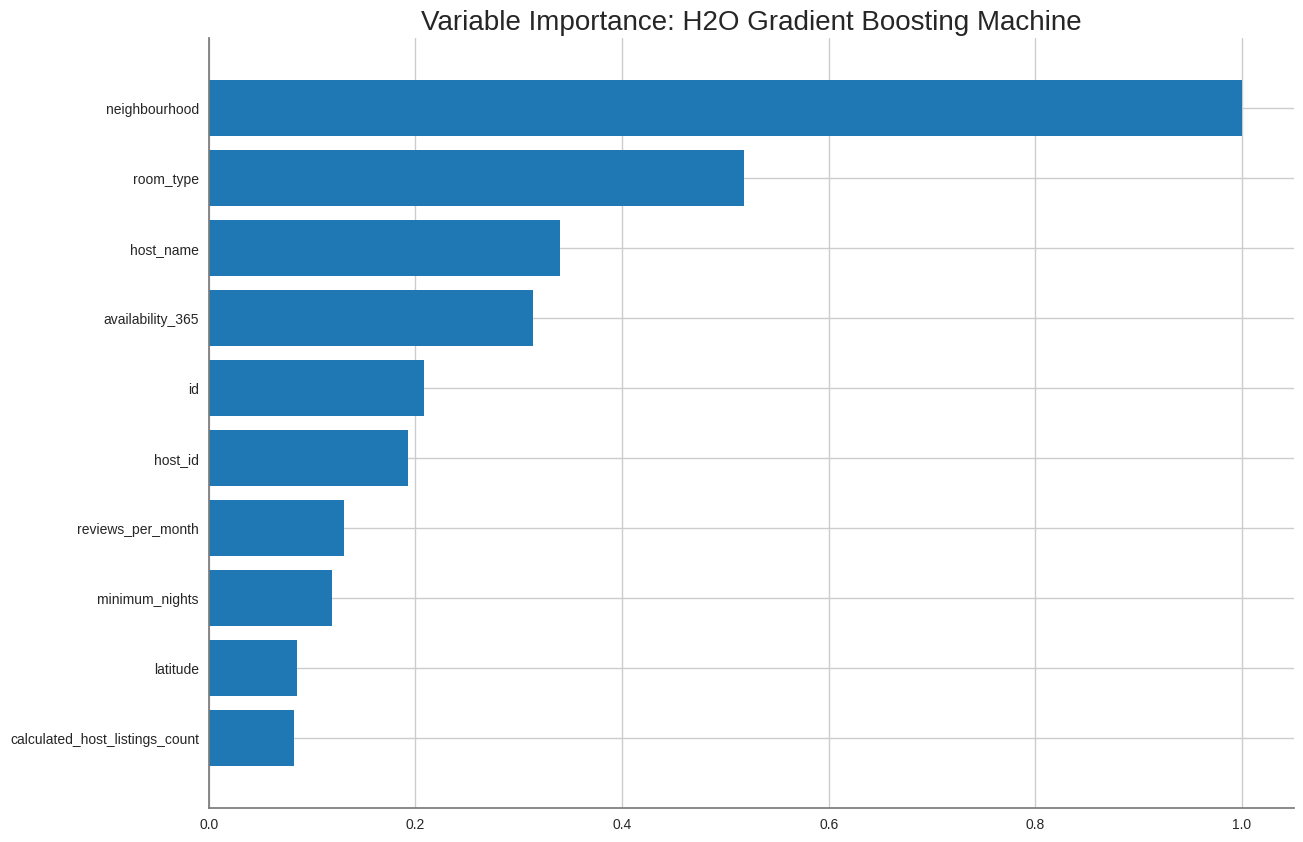

<Figure size 800x550 with 0 Axes>

In [ ]:
# Plot variables in order of their importance for price prediction
if best_model1.algo in ['gbm','drf','xrt','xgboost']:
    best_model1.varimp_plot()

### Checking if the model has violated any assumptions

In [ ]:
#Seperating the predictor and target variables
A=df
B=df['price']

In [ ]:
A_train, A_test = A.split_frame(ratios=[0.2])
b_train, b_test = B.split_frame(ratios=[0.2])

In [ ]:
cols1 = ['id', 'host_id', 'latitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']


A_train = A_train.as_data_frame()
b_train = b_train.as_data_frame()
A_train = A_train.replace(pd.NA, 0.0)
b_train = b_train.replace(pd.NA, 0.0)

merged_df = b_train.merge(A_train, on='price', how='inner')

merged_df

price        id                                               name  \
0          150      3647                THE VILLAGE OF HARLEM....NEW YORK !   
1          150     12343                                 BEST BET IN HARLEM   
2          150     75635                  Bright Cozy Chinatown Studio Apt.   
3          150    304799                   Penthouse Studio by Central Park   
4          150    506571                Large sunny 1br apt in East Village   
...        ...       ...                                                ...   
1420391    251  35681056  Elegant Times Square Apartment, with City View...   
1420392   1400   3979611                  Located at the heart of Manhattan   
1420393   1400  35713184  Prospect Park Historic 1BR near 2,5,Q, B, S tr...   
1420394    282  32234674         Tribeca Studio w/ Gym + Pool by Blueground   
1420395    421  36315794                    Elegant Chelsea 2BR w/ Elevator   

           host_id   host_name neighbourhood_group              neighbourhood  \
0             4632   Elisabeth           Manhattan                     Harlem   
1            47727        Earl           Manhattan                     Harlem   
2           401696    Patricia           Manhattan            Lower East Side   
3           185753     Carolyn           Manhattan            Upper West Side   
4          2349977     Anthony           Manhattan               East Village   
...            ...         ...                 ...                        ...   
1420391  268392801      Marisa           Manhattan             Hell's Kitchen   
1420392   19407840        Peng           Manhattan           Roosevelt Island   
1420393   11503187           A            Brooklyn  Prospect-Lefferts Gardens   
1420394  107434423  Blueground           Manhattan                    Tribeca   
1420395  107434423  Blueground           Manhattan                    Chelsea   

         latitude        room_type  minimum_nights  number_of_reviews  \
0        40.80902     Private room               3                  0   
1        40.81175  Entire home/apt               7                 97   
2        40.71876  Entire home/apt               3                286   
3        40.77508  Entire home/apt               2                 11   
4        40.72756  Entire home/apt               7                 19   
...           ...              ...             ...                ...   
1420391  40.75597  Entire home/apt               3                  3   
1420392  40.75592  Entire home/apt              90                 31   
1420393  40.66085  Entire home/apt              10                  1   
1420394  40.71543  Entire home/apt              30                  0   
1420395  40.74451  Entire home/apt              30                  0   

         reviews_per_month  calculated_host_listings_count  availability_365  
0                      NaN                               1               365  
1                     0.84                               1               309  
2                     2.81                               1               191  
3                     0.13                               1                 2  
4                     0.32                               1                24  
...                    ...                             ...               ...  
1420391               3.00                               1               258  
1420392               0.53                               1                88  
1420393               1.00                               1                17  
1420394                NaN                             232               302  
1420395                NaN                             232               292  

[1420396 rows x 14 columns]

In [ ]:
merged_df = merged_df.drop_duplicates()
merged_df = merged_df.dropna()

model1 = sm.OLS(merged_df['price'].astype(float),sm.add_constant(merged_df[cols1]).astype(float)).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     10.17
Date:                Sat, 04 Nov 2023   Prob (F-statistic):           9.62e-13
Time:                        04:53:32   Log-Likelihood:                -53216.
No. Observations:                7764   AIC:                         1.064e+05
Df Residuals:                    7756   BIC:                         1.065e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -4942.3682   1925.297     -2.567      0.010   -8716.471   -1168.265
id                             -6.372e-07   3.21e-07     -1.985      0.047   -1.27e-06   -7.88e-09
host_id                        -2.777e-08   4.35e-08     -0.638      0.524   -1.13e-07    5.76e-08
latitude                         124.9708     47.268      2.644      0.008      32.312     217.629
minimum_nights                     0.4121      0.116      3.554      0.000       0.185       0.639
number_of_reviews                 -0.2325      0.059     -3.914      0.000      -0.349      -0.116
calculated_host_listings_count     0.2918      0.096      3.029      0.002       0.103       0.481
availability_365                   0.0834      0.021      3.925      0.000       0.042       0.125
==============================================================================
Omnibus:                    20537.941   Durbin-Watson:                   1.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        551250146.890
Skew:                          31.281   Prob(JB):                         0.00
Kurtosis:                    1306.881   Cond. No.                     7.52e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.52e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
b_pred = model1.predict(sm.add_constant(merged_df[cols1]).astype(float))
b_pred

1          164.279104
2           97.174183
3          151.852452
4          147.759474
5          140.293895
              ...    
1420389    145.040241
1420390    144.494608
1420391    143.087338
1420392    185.368908
1420393    121.573620
Length: 7764, dtype: float64

In [ ]:
residuals = merged_df['price'].astype(float)-b_pred.astype(float)
mean_residuals = np.mean(residuals.astype(float))
print("Mean of Residuals {}".format(mean_residuals.astype(float)))

Mean of Residuals 2.249136820458555e-12


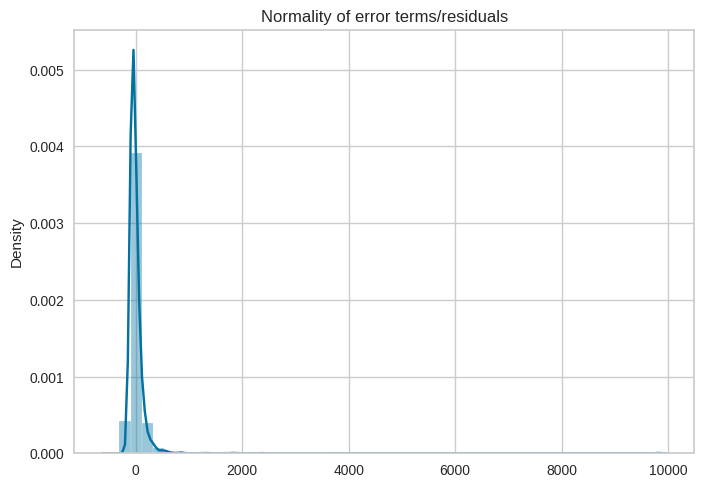

In [ ]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

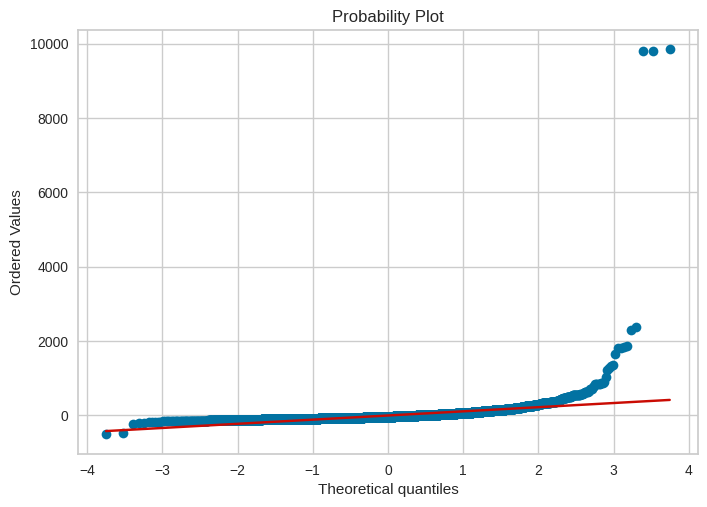

In [ ]:
import pylab
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

<Axes: xlabel='price', ylabel='Count'>

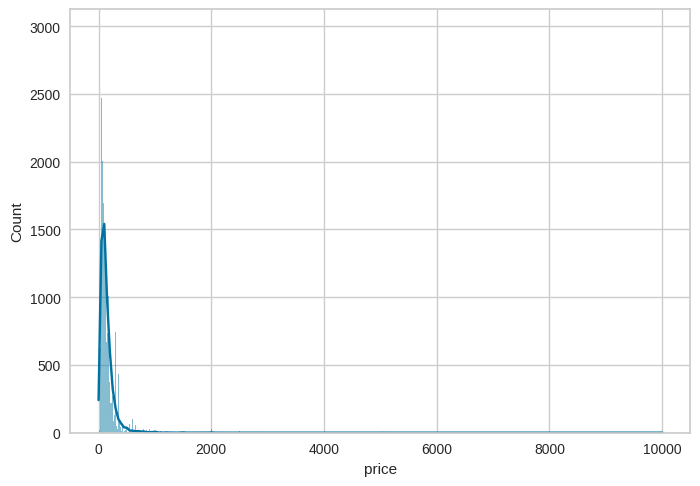

In [ ]:
sns.histplot(dfpd.price, kde = True)

### H2O Generalized Linear Estimator to fit a generalized linear model

In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
house_glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = 0, compute_p_values = True)
house_glm_regularization = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = .001, alpha = 0)

In [ ]:
house_glm_regularization.train(x = X1, y = y1_numeric, training_frame = df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1699073020973_29


GLM Model: summary
    family    link      regularization            number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 0.001 )  11689                         10241                          36                      py_9_sid_8d86

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 49007.017996325754
RMSE: 221.3752876820847
MAE: 70.1185838088826
RMSLE: NaN
Mean Residual Deviance: 49007.017996325754
R^2: 0.15473510471354923
Null degrees of freedom: 39190
Residual degrees of freedom: 28949
Null deviance: 2272227384.5799847
Residual deviance: 1920634042.2940025
AIC: 554957.0192576033

Scoring History: 
     timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse      training_deviance    training_mae      training_r2
---  -------------------  ----------  ------------  -------------------------  ------------------  -----------------  -------------------  ----------------  -------------------
     2023-11-04 04:53:37  0.000 sec   0             2272227384.5799847         57978.29564389744
     2023-11-04 04:53:37  0.014 sec   1             2127783331.4406807         54294.357570626096
     2023-11-04 04:53:37  0.039 sec   2             2073418098.3155384         52910.15334581032
     2023-11-04 04:53:37  0.054 sec   3             2064223131.9585607         52676.19410315997
     2023-11-04 04:53:37  0.083 sec   4             2052849628.2951994         52387.22636382606
     2023-11-04 04:53:37  0.157 sec   5             2048076062.062624          52267.35031678582
     2023-11-04 04:53:37  0.175 sec   6             2043139069.419497          52143.23225127547
     2023-11-04 04:53:37  0.192 sec   7             2037272914.774479          51996.58930568267
     2023-11-04 04:53:38  0.210 sec   8             2029046417.2798629         51791.649909187974
     2023-11-04 04:53:38  0.262 sec   9             2026954648.3783104         51741.903446577344
---  ---                  ---         ---           ---                        ---                 ---                ---                  ---               ---
     2023-11-04 04:53:38  0.916 sec   27            1936051093.9694033         49774.909489549835
     2023-11-04 04:53:38  0.940 sec   28            1935238617.7594628         49761.75774468574
     2023-11-04 04:53:38  0.970 sec   29            1933703640.250164          49732.99204856469
     2023-11-04 04:53:38  0.988 sec   30            1930492549.1697245         49675.46361948076
     2023-11-04 04:53:38  1.005 sec   31            1928558140.7629585         49641.473385867626
     2023-11-04 04:53:38  1.035 sec   32            1927699936.199255          49623.98808562687
     2023-11-04 04:53:38  1.065 sec   33            1925661345.230823          49588.43214563627
     2023-11-04 04:53:38  1.095 sec   34            1925211361.1286597         49578.99473831063
     2023-11-04 04:53:38  1.126 sec   35            1924372967.2858224         49557.16688483182
     2023-11-04 04:53:38  1.148 sec   36            1920634042.2940025         49494.47607857072   221.3752876820847  49007.017996325754   70.1185838088826  0.15473510471354923
[37 rows x 10 columns]


Variable Importances: 
variable               relative_importance    scaled_importance    percentage
---------------------  ---------------------  -------------------  --------------------
host_name.Sally        431.9977111816406      1.0                  0.015308145365357444
neighbourhood.Tribeca  235.2796173095703      0.5446316293343579   0.008337300152421826
host_name.Red Awning   230.0059051513672      0.5324238976225903   0.008150422420

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                   rmse      mse      mae       rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  -------  -------  -------  ----------  ------------------------  ------------------  -------------------------  ---------------
GBM_1_AutoML_2_20231104_44940                           216.577  46905.7  66.9607  nan                          46905.7                8422                   0.042028  GBM
GBM_2_AutoML_2_20231104_44940                           216.712  46964.1  65.5121    0.494041                   46964.1                1478                   0.018378  GBM
StackedEnsemble_AllModels_1_AutoML_2_20231104_44940     217.083  47125.2  65.8252  nan                          47125.2                1709                   0.059577  StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_2_20231104_44940  217.295  47217    67.1428  nan                          47217                   984                   0.049238  StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_2_20231104_44940  217.929  47493.2  67.4784  nan                          47493.2                 889                   0.052175  StackedEnsemble
GBM_4_AutoML_2_20231104_44940                           218.509  47746.4  67.0753    0.515876                   47746.4                1387                   0.011585  GBM
GBM_3_AutoML_2_20231104_44940                           219.272  48080.3  67.0259    0.521633                   48080.3                1714                   0.005978  GBM
XGBoost_2_AutoML_2_20231104_44940                       223.936  50147.1  67.7002  nan                          50147.1                1667                   0.003697  XGBoost
XGBoost_1_AutoML_2_20231104_44940                       228.102  52030.5  74.4152  nan                          52030.5                8912                   0.006287  XGBoost
GBM_5_AutoML_2_20231104_44940                           228.339  52138.5  79.6058    0.652493                   52138.5                 178                   0.002478  GBM
XGBoost_3_AutoML_2_20231104_44940                       232.123  53881    67.7111    0.556306                   53881                   309                   0.001605  XGBoost
DRF_1_AutoML_2_20231104_44940                           247.028  61022.7  74.2093    0.540759                   61022.7                1291                   0.003778  DRF
XRT_1_AutoML_2_20231104_44940                           300.153  90092.1  83.2057    0.610623                   90092.1                1062                   0.001436  DRF
[13 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

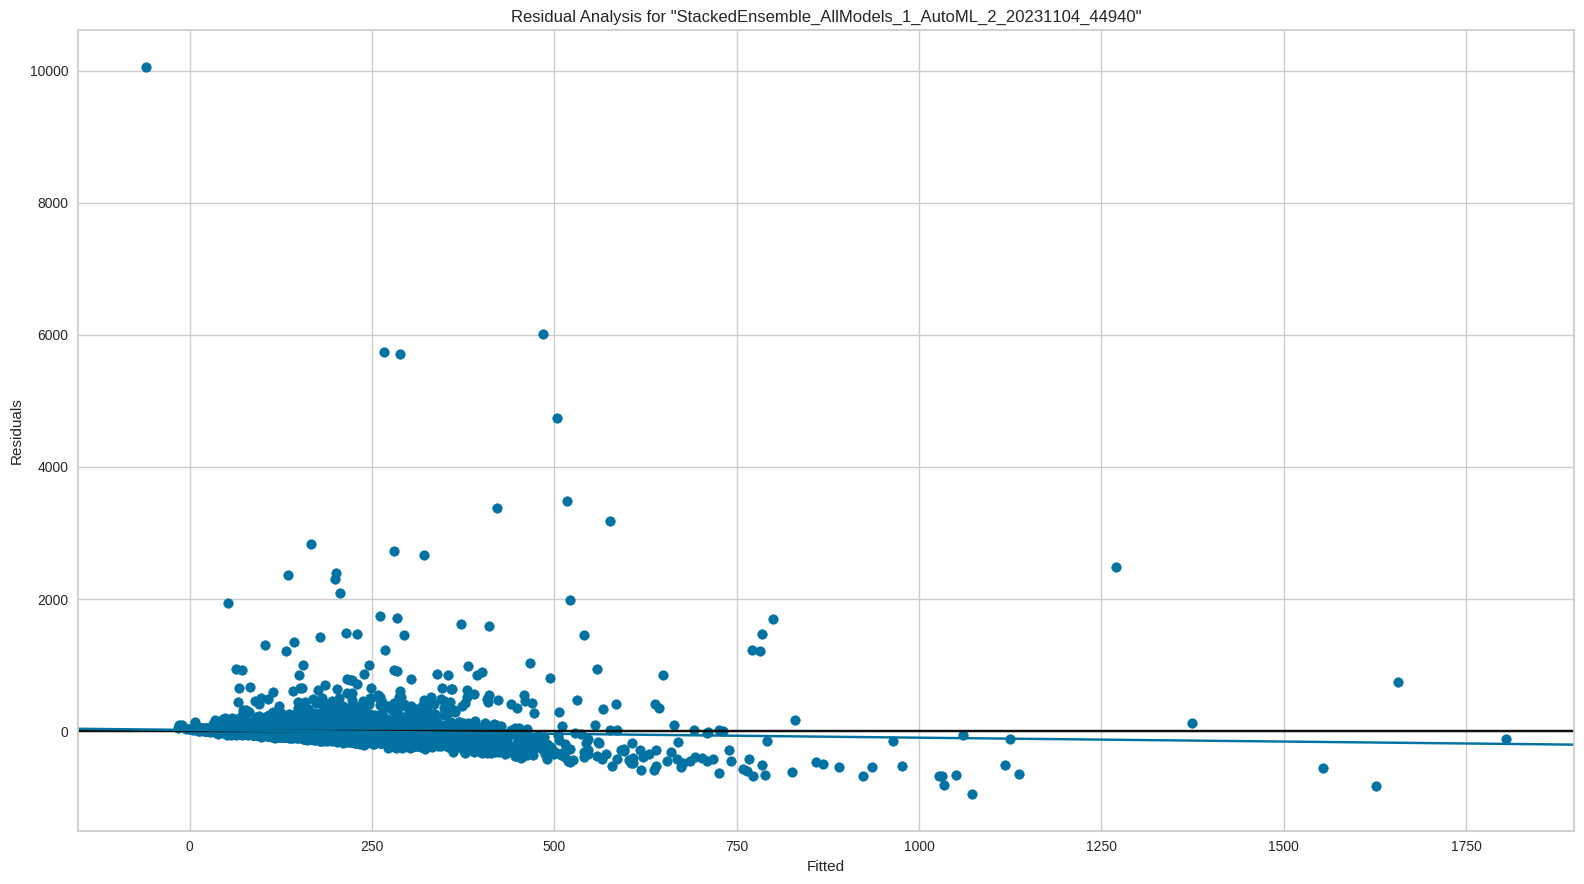

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

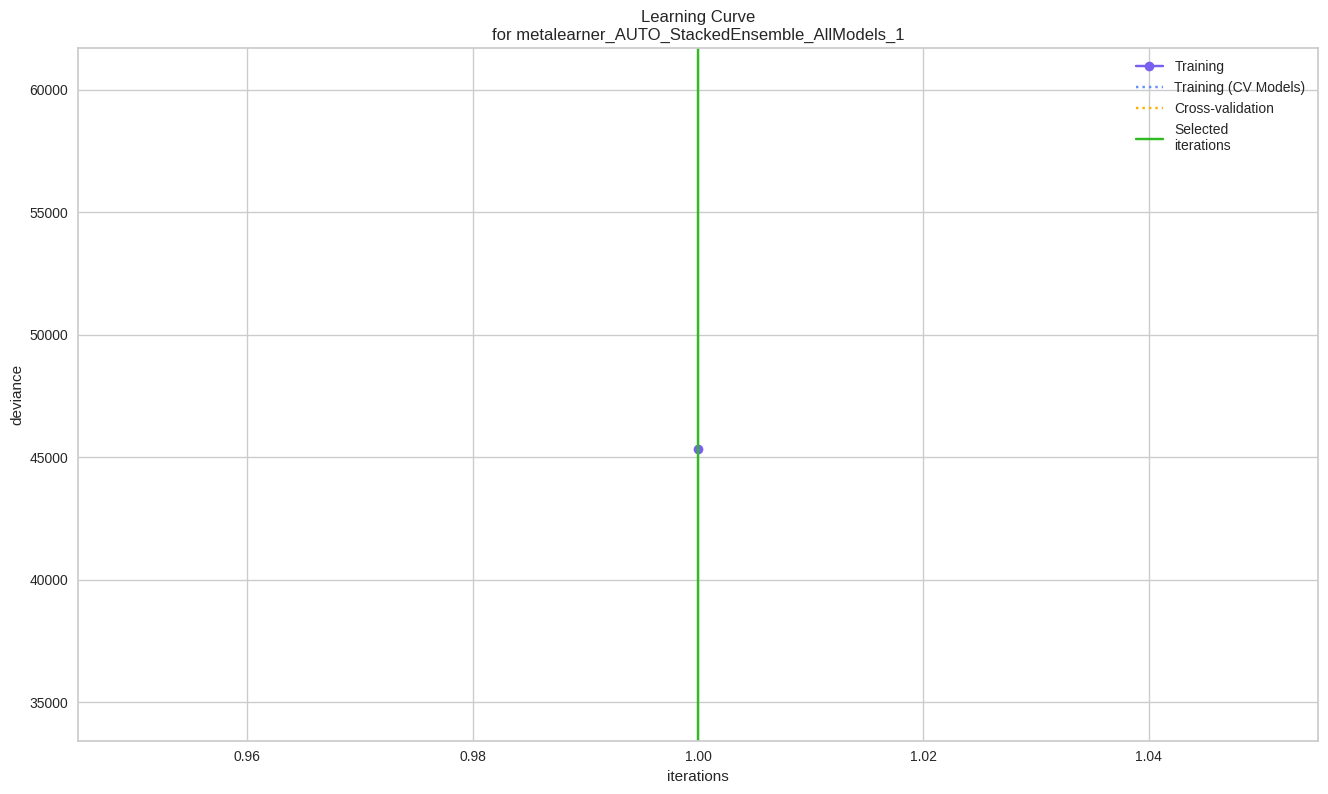

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

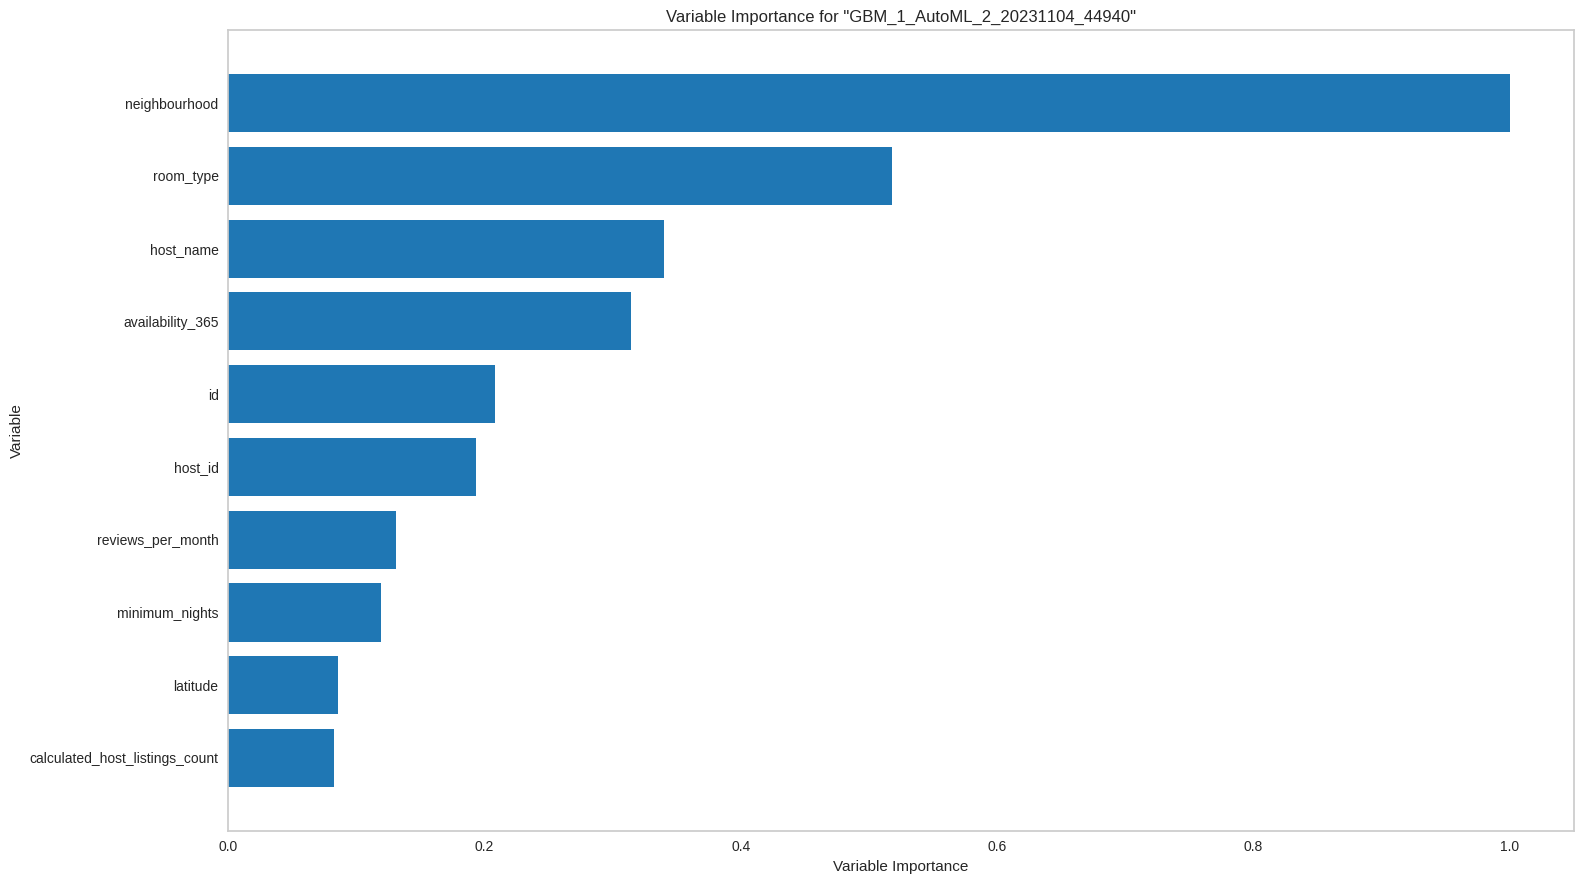

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

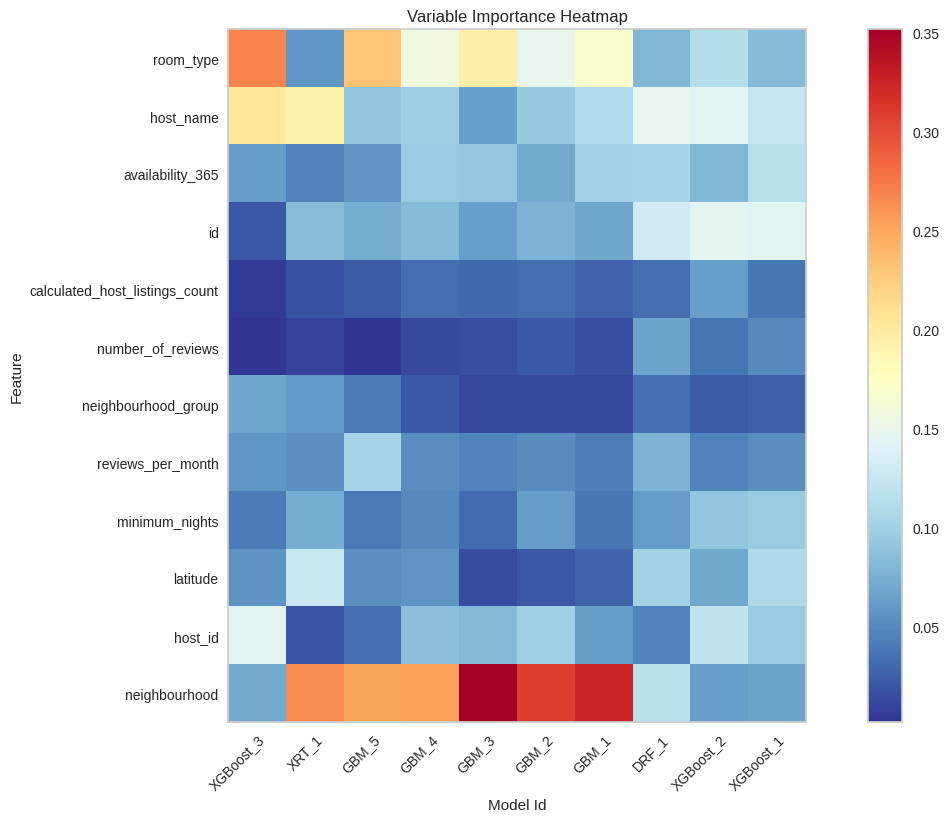

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

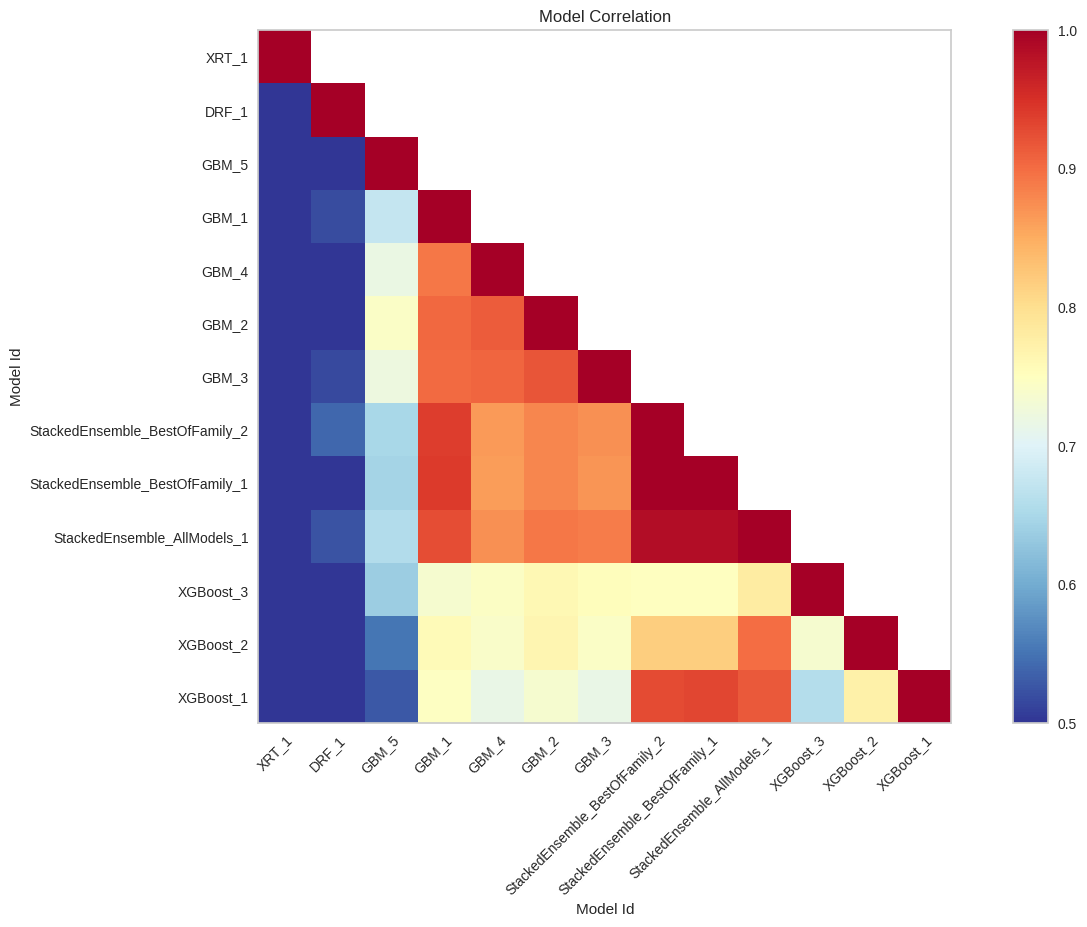

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

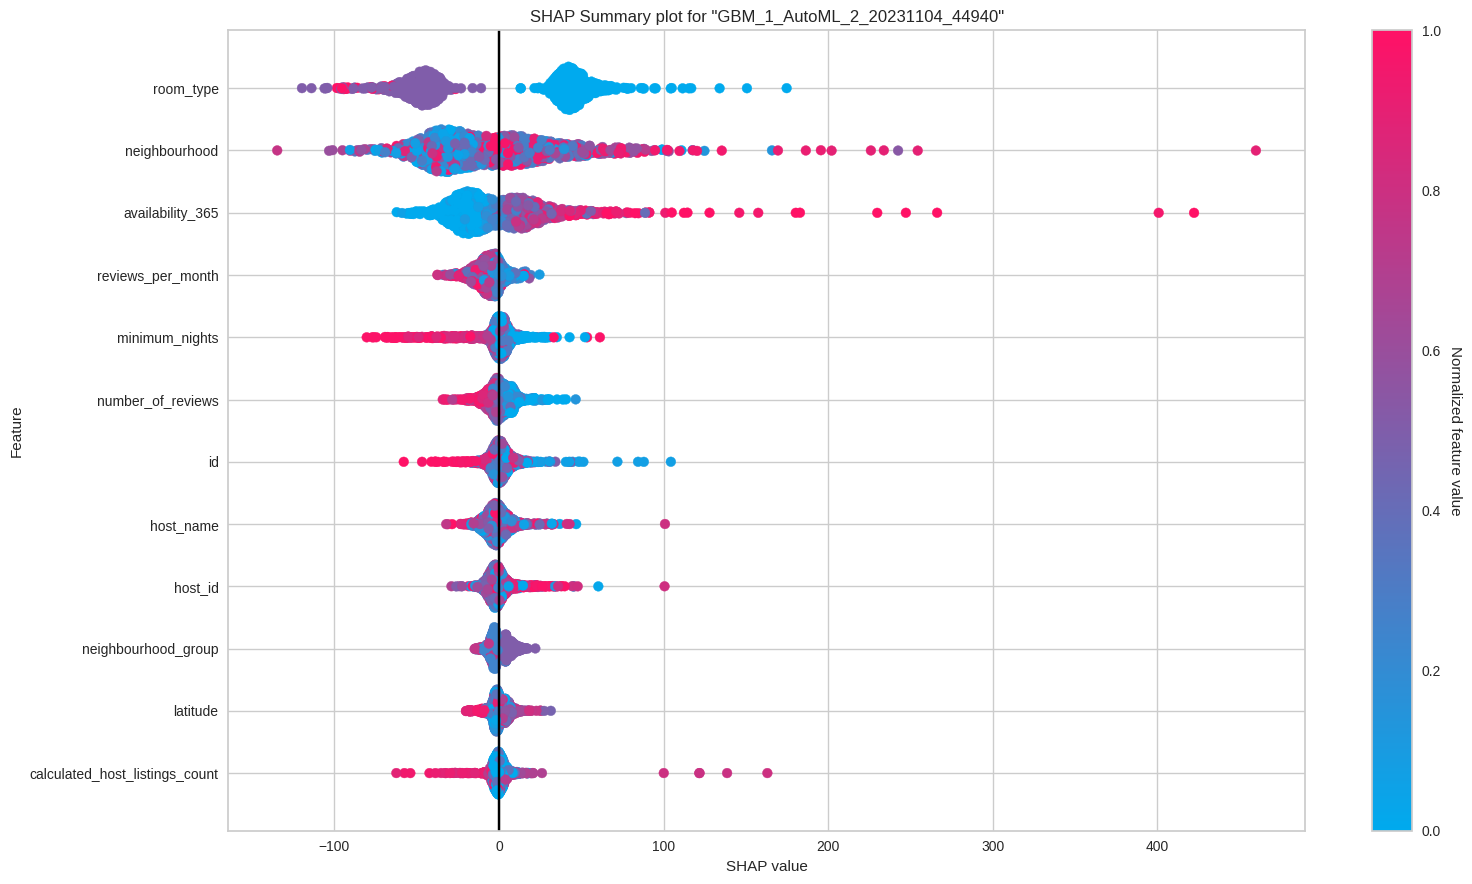

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

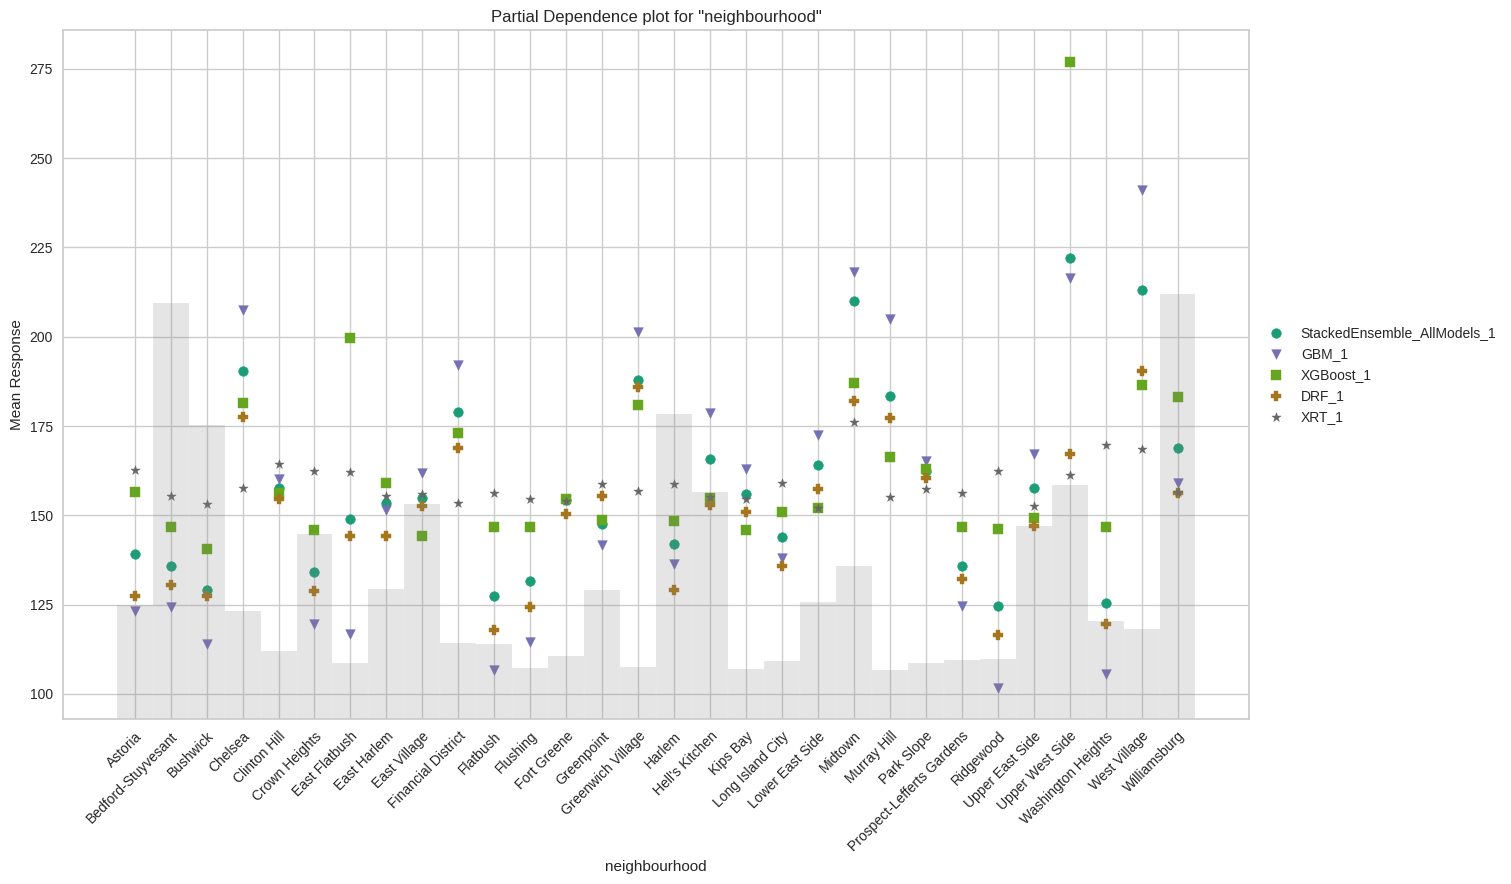

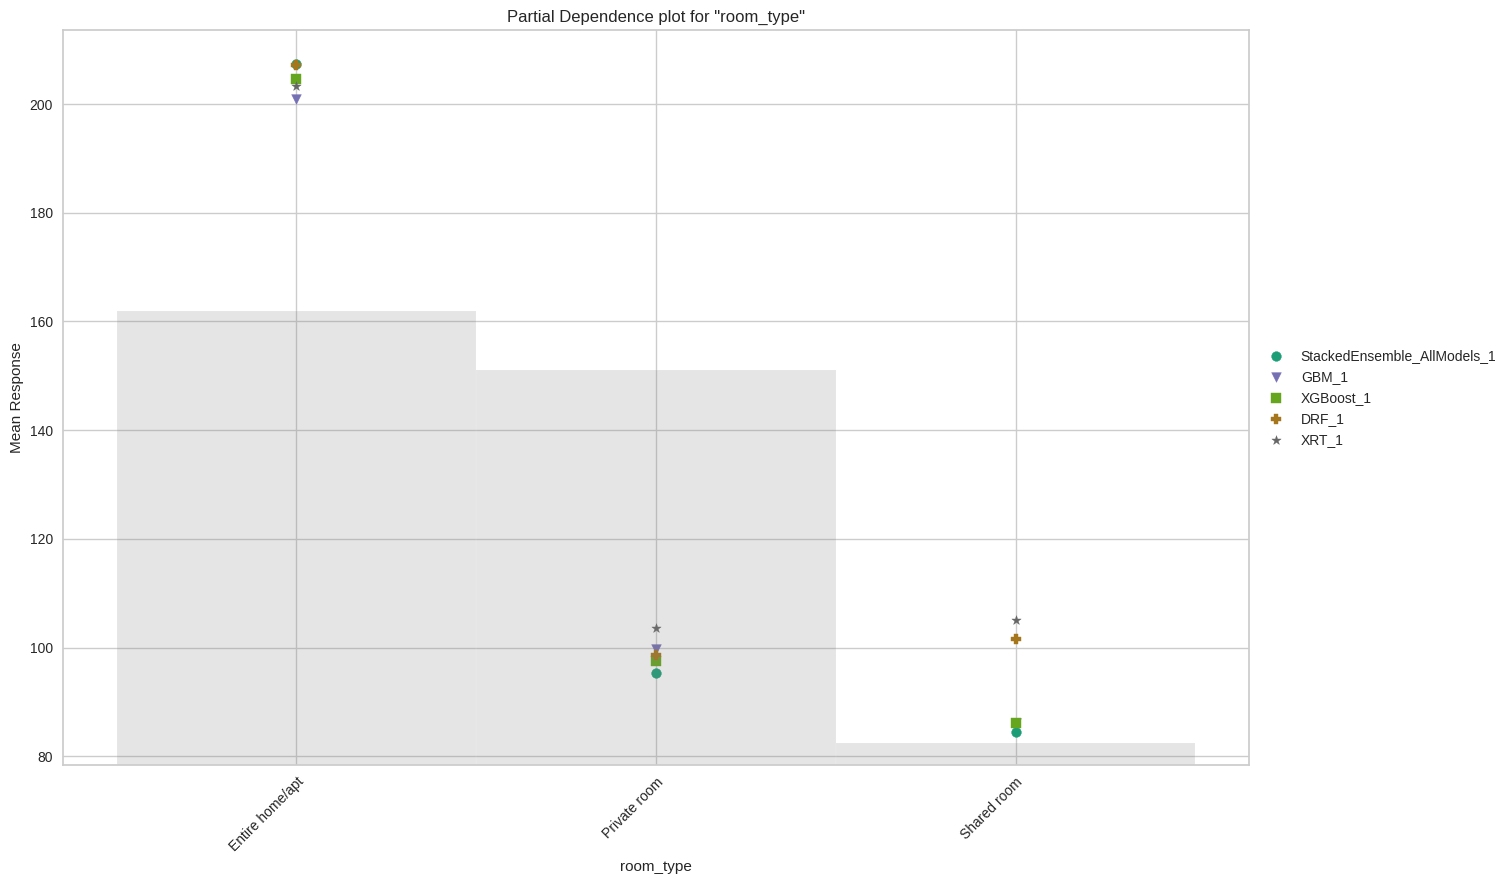

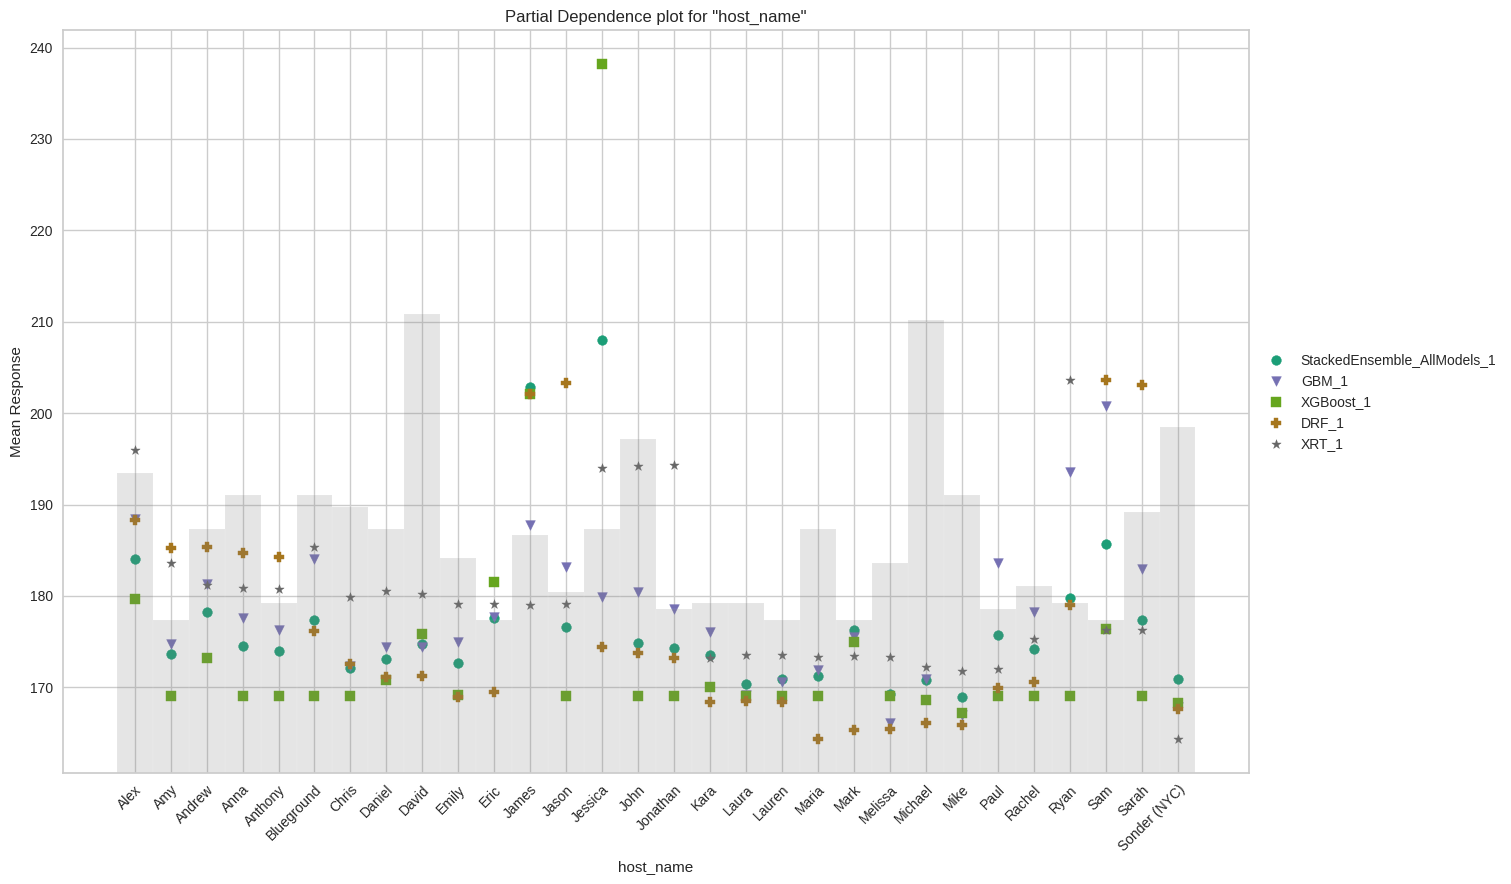

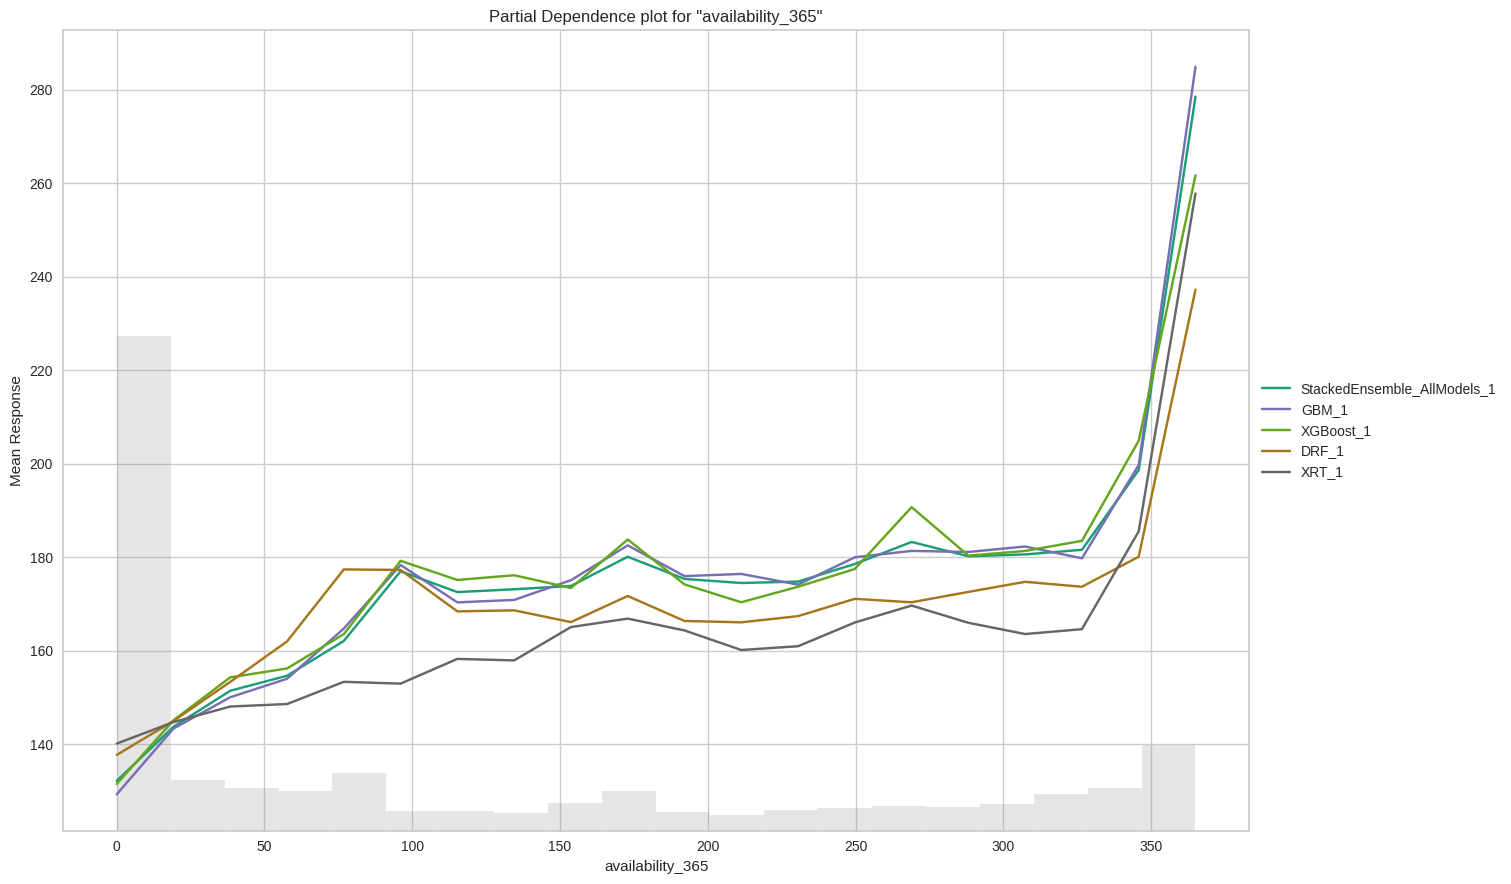

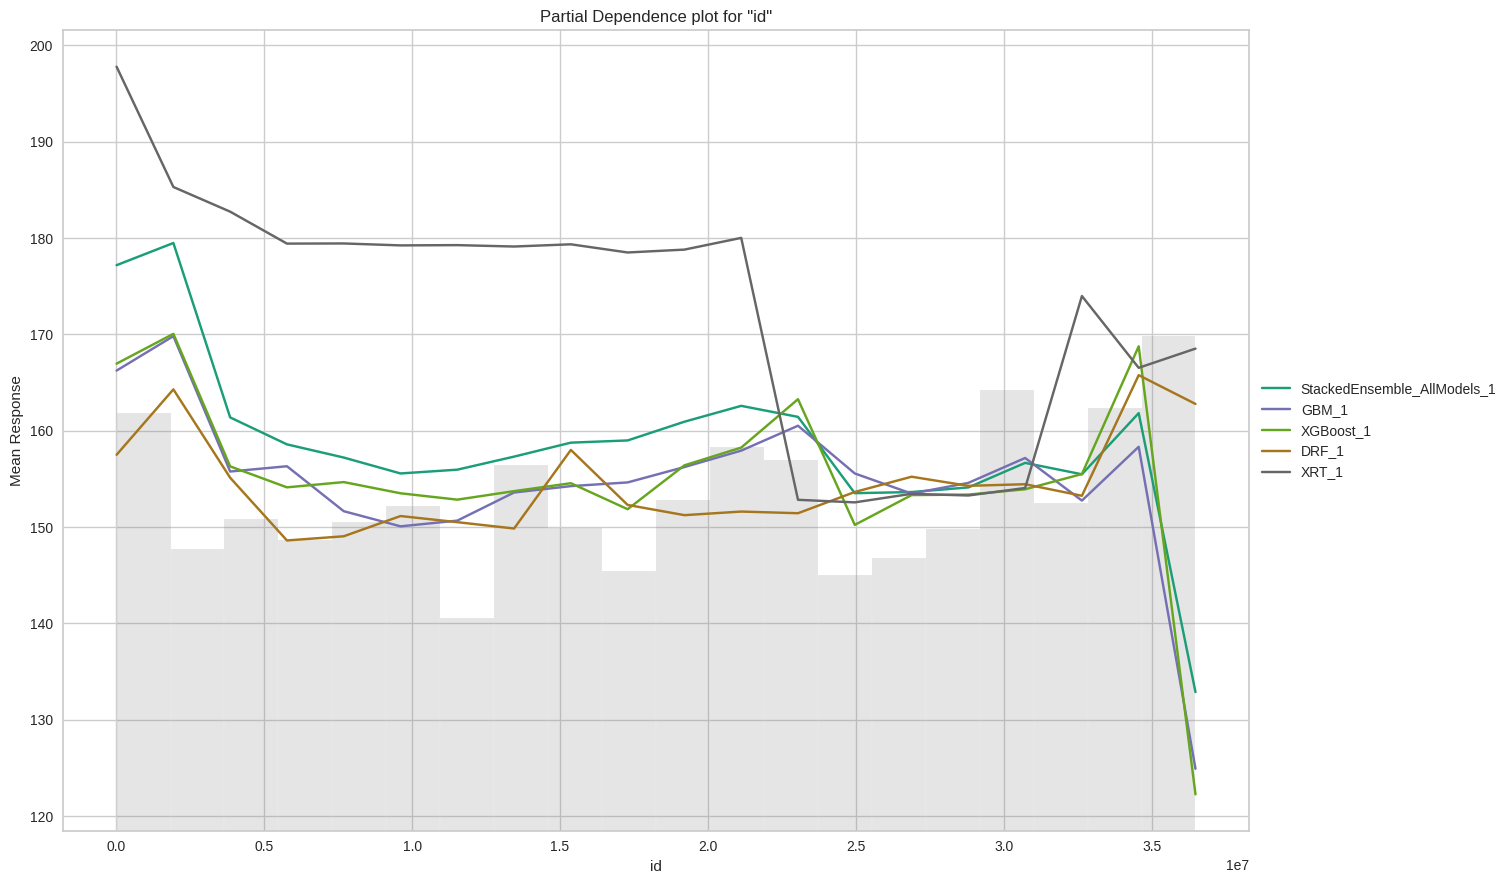

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

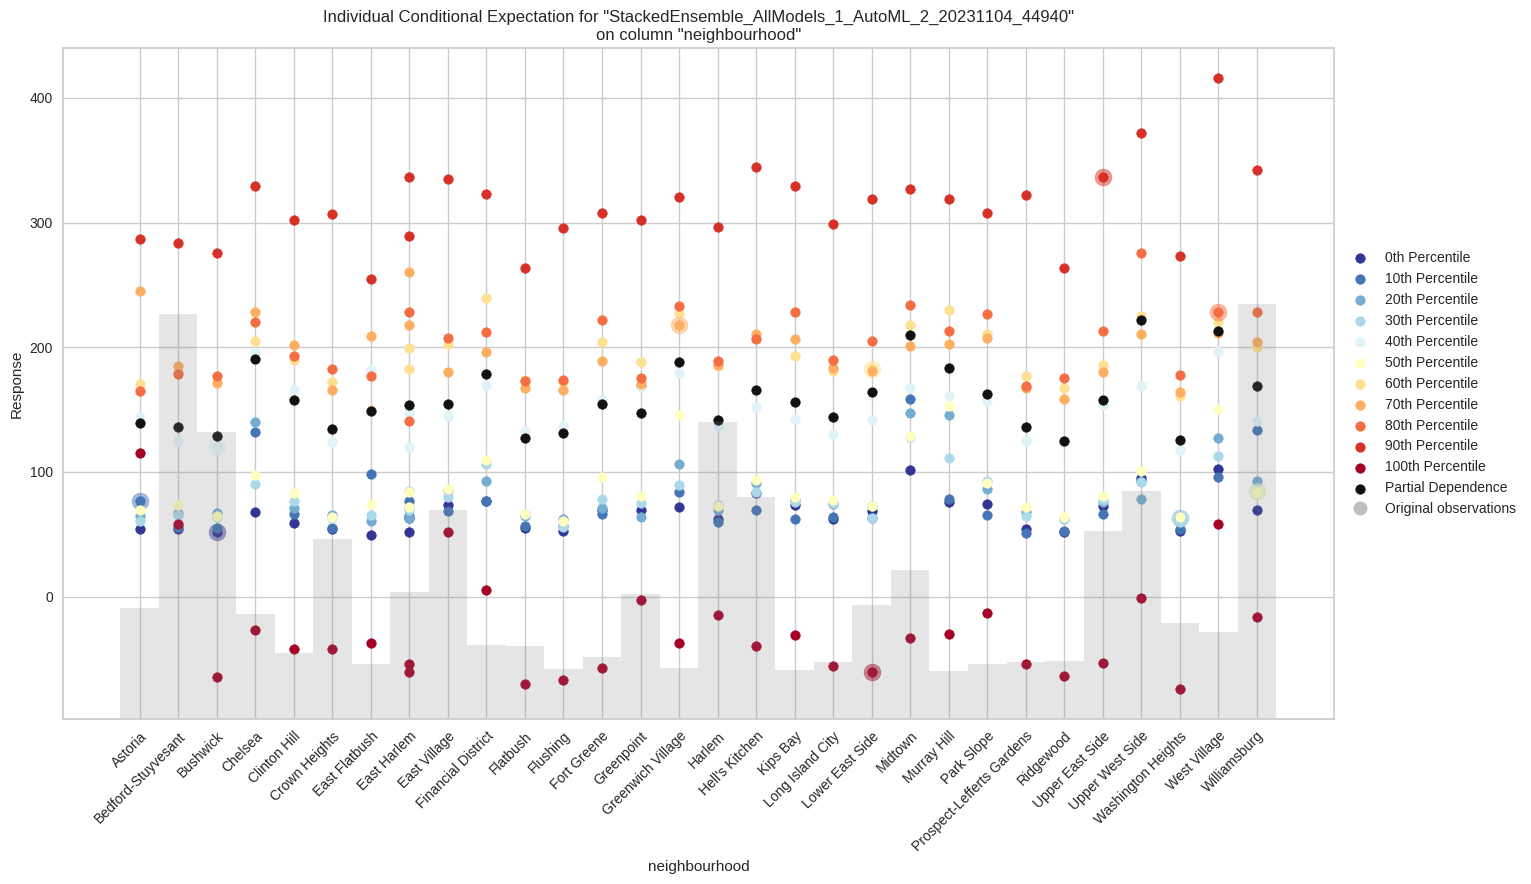

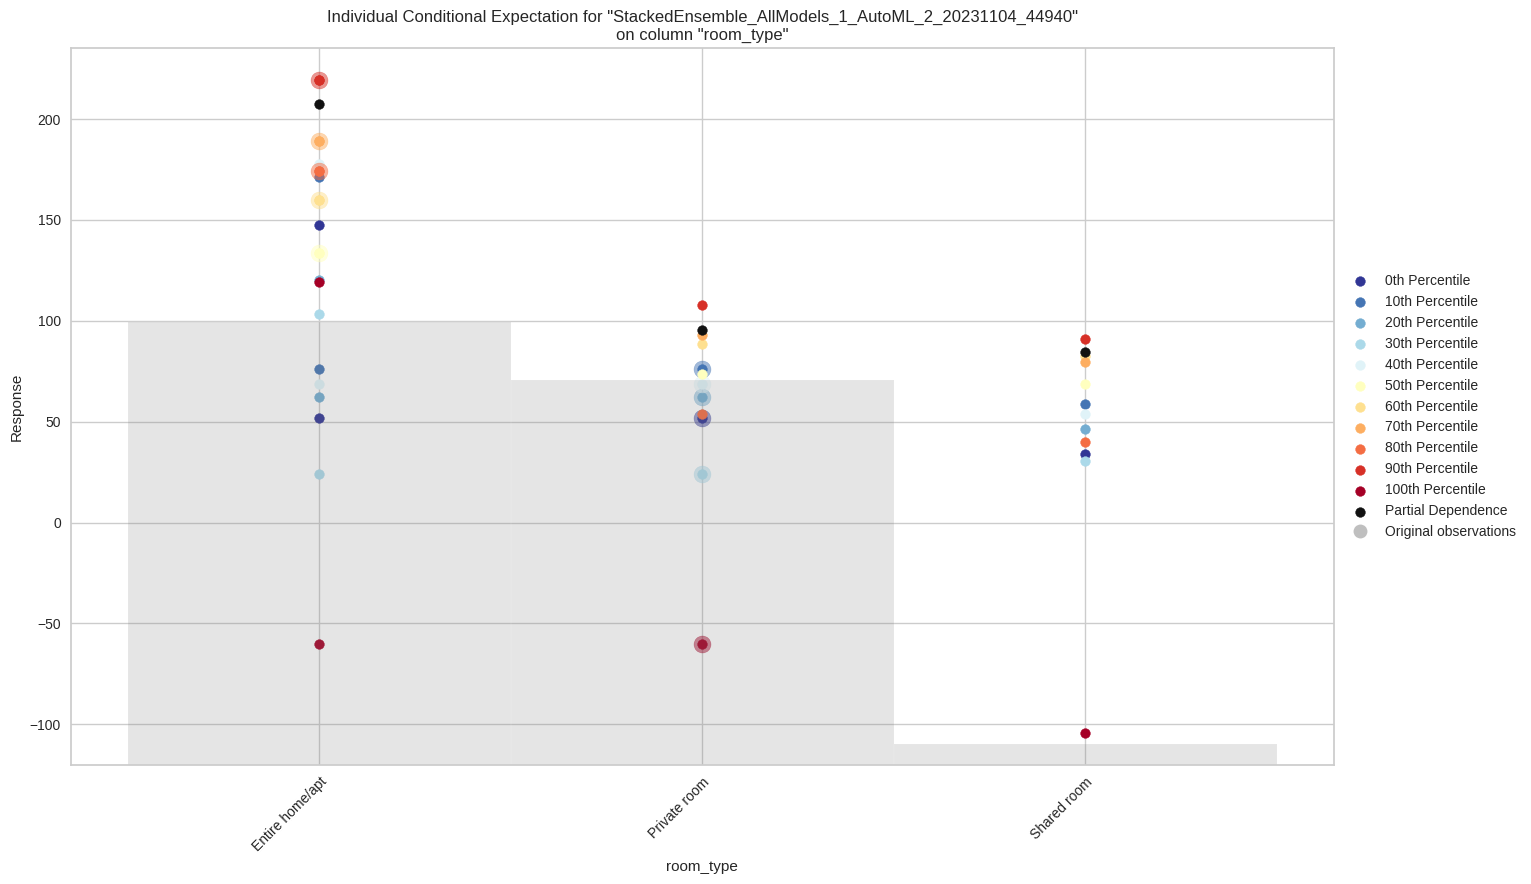

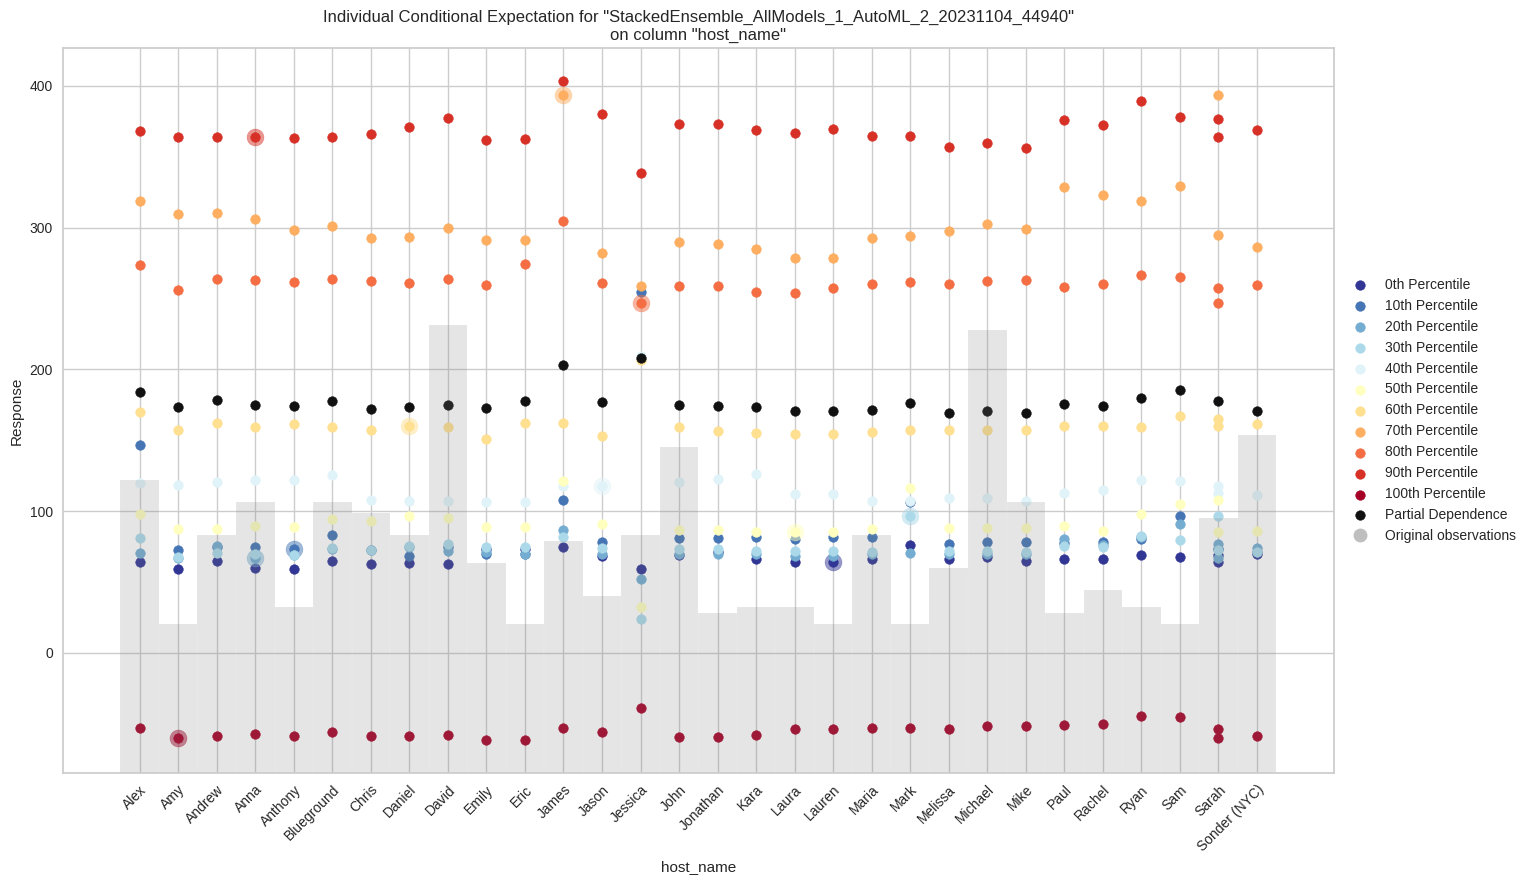

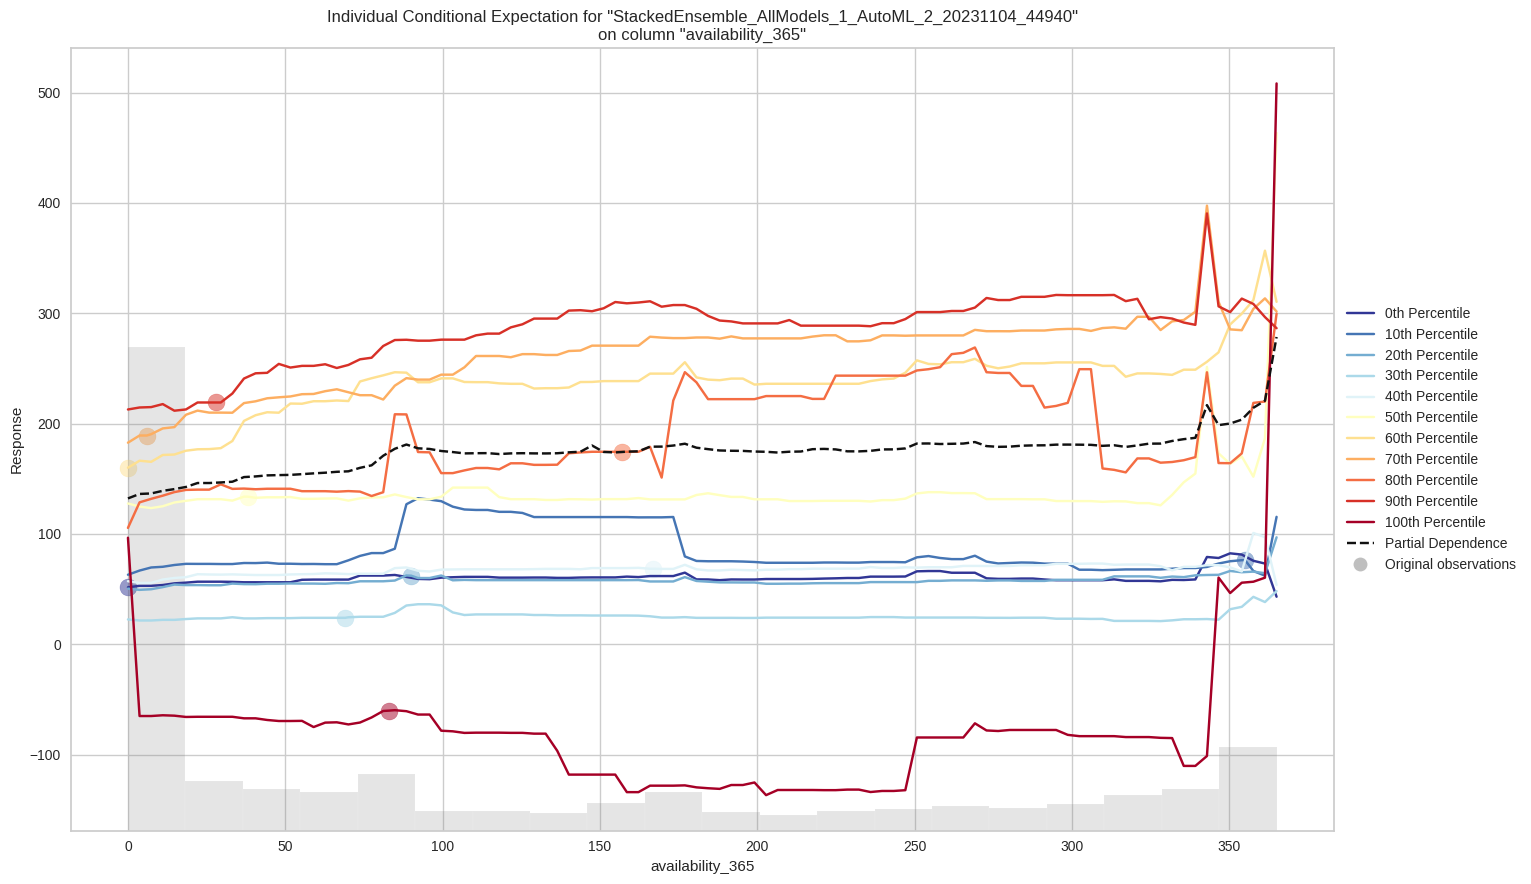

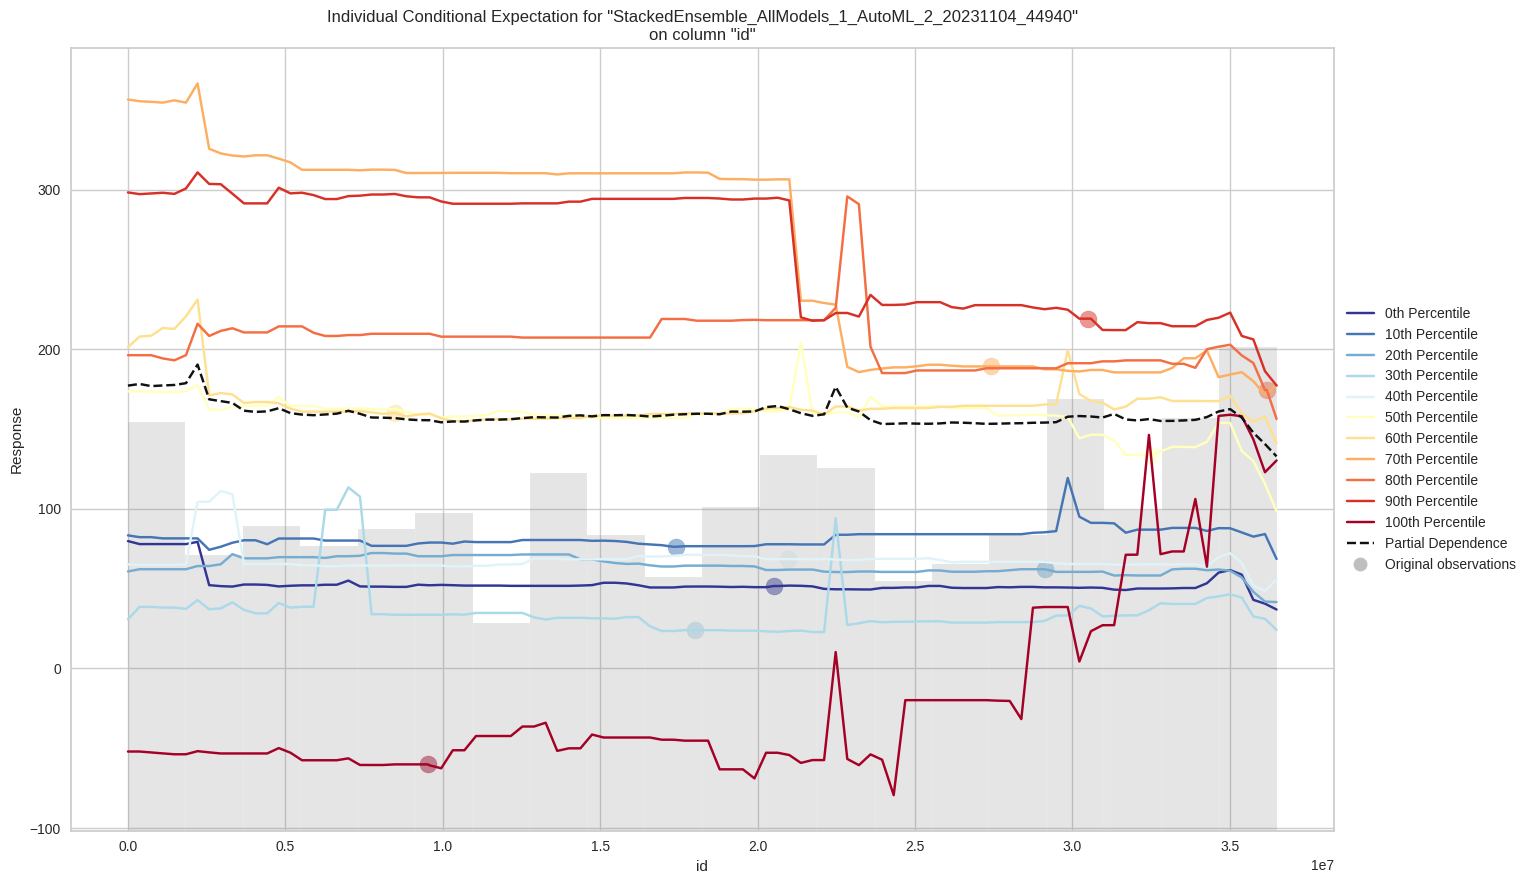

In [ ]:
exa = aml1.explain(df_test)

In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

In [ ]:
merged_df = merged_df.drop_duplicates()
merged_df = merged_df.dropna()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor

mode = RandomForestRegressor()

param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100,200, 300, 400], 'min_samples_split' : [2,3,5]

}

random_rf = RandomizedSearchCV(estimator=mode, param_distributions=param_vals,

n_iter=10, scoring='accuracy', cv=5,

refit=True, n_jobs=-1)


#Training and prediction

rf_model = random_rf.fit(merged_df[cols1], merged_df['price'])

In [ ]:
col_names = rf_model.feature_names_in_.tolist()

# A_test = A_test.as_data_frame()
A_test = A_test.replace(pd.NA, 0.0)
A_test = A_test.drop_duplicates()
A_test = A_test.dropna()
# t_test_updated = t_test[col_names]

A_test = pd.DataFrame(A_test)
preds = random_rf.best_estimator_.predict(A_test[col_names])

In [ ]:
random_rf.best_params_

{'n_estimators': 100, 'min_samples_split': 3, 'max_depth': 1100}

## Answer the following questions for all of the models:

### Is the relationship significant?
When the p-value is low, usually below a predefined significance level (often set at 0.05), it signifies that the observed relationship is considered statistically significant. The p-value represents the probability of obtaining a result as extreme as the current one, assuming that the null hypothesis is true. A low p-value indicates that there is very little similarity between the two groups being compared, and it suggests that the null hypothesis can be rejected.

In the case of this model, the p-values were calculated using two different methods. When applying the Ordinary Least Squares (OLS) method, it was observed that all the p-values were less than 0.05. As a result, for the specific dataset chosen, it can be concluded that the relationship is indeed statistically significant.


### Are any model assumptions violated?
The assumptions associated with linear regression include:

* Linearity: The relationship between the dependent and independent variables should be linear while holding other variables constant. When examining the relationship between the target variable and all independent variables, it is observed that some, such as latitude, number_of_reviews, and calculated_host_listings, exhibit a linear association. Thus, this assumption is not violated.

* Homoscedasticity (Normality of Error Distribution): The residuals should form a normally distributed pattern, resembling a bell-shaped curve. In the case of this model, this condition is satisfied.

* No or Limited Multicollinearity: Multicollinearity can be assessed through a correlation matrix. In this model, some assumptions are not met, as multicollinearity is present for the variable "number_of_reviews."

* No Autocorrelation: Autocorrelation can be determined by values falling between 1.5 to 2.5, indicating the absence of autocorrelation. For this model, the value is 1.6, signifying that this assumption is upheld.

### Is there any multicollinearity in the model?
 Multicollinearity in a model occurs when one independent variable is strongly associated with another independent variable. This poses a problem because it diminishes the statistical significance of the independent variables. You can identify multicollinearity by examining the correlation matrix or by calculating the VIF (Variance Inflation Factor) for all the variables.

In the correlation matrix, a coefficient that approaches +1 or -1 indicates a strong correlation between those two variables. As for VIF values, a value exceeding 10 indicates the presence of multicollinearity. In the current model, certain variables, such as latitude and longitude, exhibited VIF values greater than 10, and their p-values were not less than 0.05. To address this, these columns were removed, and subsequent analysis produced the desired results. At present, a strong correlation is observed between "minimum_nights" and "number_of_reviews."

### In the multivariate models are predictor variables independent of all the other predictor variables?
Variables are considered independent when they do not exhibit any significant relationship with each other. This relationship can be assessed using a correlation matrix or by visually inspecting graphs to determine if any patterns or associations exist.

Upon calculating a correlation matrix for the model, it becomes evident that "number_of_reviews" and "reviews_per_month" are indeed correlated with each other. However, apart from these two variables, the other predictors in the model appear to be independent from one another.

### In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.
The variable importance plot provides a ranking of variables from the most important to the least important in the model. In my model, the top four most influential variables for predicting the price are "minimum_nights," "number_of_reviews," "calculated_host_listings_count," and "availability_365." However, the variables "latitude" and "longitude" had high VIF and p-values that exceeded the desired values, so they were removed from the model.

### Does the model make sense?
To ensure the validity of a model, it should adhere to its underlying assumptions, maintain appropriate p-values and VIF values within their expected ranges. The RMSE should ideally be minimized while staying within the range of the target variable's minimum and maximum values. Additionally, the model exhibits a satisfactory R2 value of 0.53, which is generally considered good for accuracy assessment.

In summary, the model appears to be reasonable. To enhance its accuracy further, certain strategies can be employed, such as eliminating less important variables, addressing outliers, or implementing boosting and ensemble techniques.

### Does regularization help?
Regularization is a technique employed to fine-tune a function affected by random noise. It involves introducing an additional term into the noise function to control excessive fluctuations in the function. The aim is to prevent the coefficients from taking extreme values, ensuring that predictions for test data are not unduly influenced. The primary purpose of regularization is to minimize validation loss and enhance the model's accuracy.

In the case of this model, Ridge Regularization was applied to the training data. A comparison was made by calculating the Root Mean Square Error (RMSE) and R2 twice: once without applying regularization and once with regularization. Surprisingly, the values remained the same in both scenarios. Consequently, it can be deduced that, for this model, regularization does not yield any significant improvement.

### Which independent variables are significant?
Variables are considered to be of significance when their p-values are below 0.05. In the context of this model, with the exception of 'id' and 'host_id,' all other variables exhibit p-values lower than 0.05. Thus, it can be concluded that all variables in the model are indeed significant.

### Which hyperparameters are important?
Hyperparameter tuning is employed to discover the optimal combination of hyperparameters, including those that interact with each other, for a specific dataset. This process systematically explores various values for model hyperparameters and identifies a subset that leads to the highest performance on the given dataset. In the case of this particular model, RandomForestRegressor is utilized for the purpose of fine-tuning. The most favorable hyperparameters for this model have been determined to be 'max_depth': 1100, 'min_samples_split': 3, and 'n_estimators': 100.

## LICENSE
MIT License

Copyright (c) 2023 Rakshita Jaiswal

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

### REFERENCES
* H20.ai- https://docs.h2o.ai/
*OLS Model- http://net-informations.com/ds/mla/ols.html
*Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/
*Linear Regression Assumptions- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/
* Kaggle Notebook- https://www.kaggle.com/stephaniestallworth/melbourne-housing-market-eda-and-regression
* Dataset- https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data?rvi=1
* Notebooks: https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb
* Professor's AutoML Notebook- https://github.com/nikbearbrown/AI_Research_Group/tree/main/Kaggle_Datasets/AutoML
